# Data Visualization EDA

## *Overview*
Public and non-profit enitities are eligible to receive Health Center Program grant funding to provide medical, dental, and mental health services to underserved individuals across the United States and its territories. Entities that receive this funding are charged with increasing access to quality health care services to medically underserved populations. 

In this notebook, I will visually explore the relationships between various features of each entity and whether they are correlated with the total health center funding an entity receives. 

[Link to Data Definitions](https://bphc.hrsa.gov/sites/default/files/bphc/data-reporting/2022-uds-manual.pdf)

In [6]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import plotly.express as px
from configuration.config import DATA_PATH

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Update on 7/11/24 
I am using a new version of my dataset that does not include imputations for health center ops and finance columns. See notes at the end of the data wrangling notebook for more information.

In [9]:
health_centers = pd.read_csv(DATA_PATH + 'clean_data_v2.csv')

In [10]:
health_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 84 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BHCMISID                            1344 non-null   object 
 1   GrantNumber                         1344 non-null   object 
 2   HealthCenterName                    1344 non-null   object 
 3   HealthCenterCity                    1344 non-null   object 
 4   HealthCenterState                   1344 non-null   object 
 5   FundingCHC                          1344 non-null   bool   
 6   FundingMHC                          1344 non-null   bool   
 7   FundingHO                           1344 non-null   bool   
 8   FundingPH                           1344 non-null   bool   
 9   UrbanRuralFlag                      1344 non-null   object 
 10  mhc_amount                          1344 non-null   int64  
 11  chc_amount                          1344 no

The clean dataset has 84 columns and 1344 observations. Several columns from the oepartions and finance table contain missing values that are missing not at random.

In [11]:
health_centers.columns

Index(['BHCMISID', 'GrantNumber', 'HealthCenterName', 'HealthCenterCity',
       'HealthCenterState', 'FundingCHC', 'FundingMHC', 'FundingHO',
       'FundingPH', 'UrbanRuralFlag', 'mhc_amount', 'chc_amount', 'ho_amount',
       'ph_amount', 'total_hc_funding', 'bphc_total',
       'total_other_federal_grants', 'total_state_grants',
       'total_local_gov_grants', 'total_private_grants', 'total_other_revenue',
       'total_revenue', 'total_male', 'total_female', 'asian',
       'native_hawaiian', 'pac_isl', 'black', 'am_ind', 'white', 'unreported',
       'hispanic_any_race', 'total_patients', 'lep_patients', 'fpl_100_below',
       'fpl_101_to_150', 'fpl_151_to_200', 'fpl_over_200', 'fpl_unknown',
       'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17', 'medicaid_18_up',
       'medicare_18_up', 'public_insurance_0_17', 'public_insurance_18_up',
       'private_insurance_0_17', 'private_insurance_18_up', 'total_0_17',
       'total_18_up', 'migrant_patients', 'homeless_patients'

In [12]:
health_centers.head(3)

BHCMISID GrantNumber                          HealthCenterName  \
0   010030  H80CS00803               HOLYOKE HEALTH CENTER, INC.   
1   010040  H80CS00443          MAINE MOBILE HEALTH PROGRAM INC.   
2   010060  H80CS00741  FAIR HAVEN COMMUNITY HEALTH CLINIC, INC.   

  HealthCenterCity HealthCenterState  FundingCHC  FundingMHC  FundingHO  \
0          Holyoke                MA        True       False      False   
1          Augusta                ME       False        True      False   
2        New Haven                CT        True       False      False   

   FundingPH UrbanRuralFlag  ...  enabling_virtual_visits  enabling_patients  \
0      False          Urban  ...                      NaN                NaN   
1      False          Rural  ...                    175.0              263.0   
2      False          Urban  ...                   5057.0             3539.0   

   total_clinic_visits  total_virtual_visits  ZipCode_Count  SiteCity_Count  \
0                  NaN                   NaN             50             3.0   
1               2381.0                 192.0             24             2.0   
2              96387.0               27893.0             62             3.0   

   SiteState_Count  Admin_Service_Delivery_Sites_Count  \
0              1.0                                 0.0   
1              1.0                                 4.0   
2              1.0                                 1.0   

   Service_Delivery_Sites_Count  TotalWeeklyHoursOfOperation  
0                           4.0                        175.0  
1                           2.0                        195.0  
2                          16.0                        603.0  

[3 rows x 84 columns]

## Health Center Funding and Patients Served

I first want to take a look at the distribution of health center funding, total patients served, and any correlation between these variables across entities. I also want to see if there are any particular clusters around funding and whether an entity is considered a rural or urban provider. 

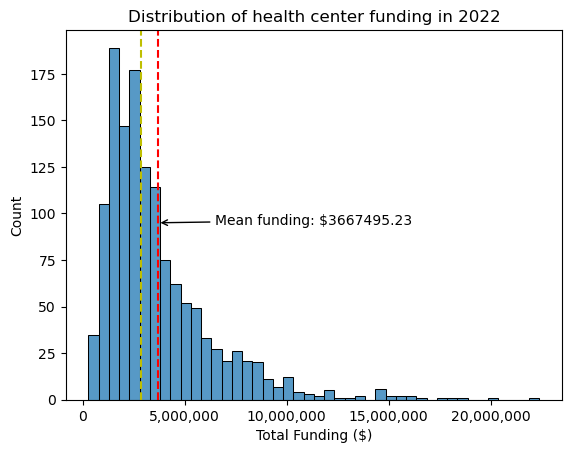

In [13]:
# plot ahealth center funding histogram
fig, ax = plt.subplots()
sns.histplot(x='total_hc_funding', data=health_centers)
plt.title('Distribution of health center funding in 2022')
plt.xlabel('Total Funding ($)')

mean_funding = health_centers['total_hc_funding'].mean()
plt.axvline(mean_funding, linestyle='--', color='r', label=f'Mean funding: ${mean_funding:.2f}')

# Adding text and arrow annotation
plt.annotate('Mean funding: ${:.2f}'.format(mean_funding),
             xy=(mean_funding, 95),
             xycoords='data',
             xytext=(6500000, 100),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             horizontalalignment='left',
             verticalalignment='top')

plt.axvline(health_centers['total_hc_funding'].median(), linestyle='--', color='y', label=f'Median funding: ${mean_funding:.2f}')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 


In [14]:
health_centers[['total_hc_funding']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

total_hc_funding
count          1344.00
mean        3667495.23
std         2740681.38
min          275778.00
25%         1803810.00
50%         2856994.50
75%         4602146.75
max        22382349.00

Health center funding is heavily right skewed. Most health centers between 1.8M and 4.6M of health center funding annually, with the mean funding level just over 3.6 million. 

There are several outliers that get more than 10,000,000 and some as high as 22,000,000 in total health center funding each year. 

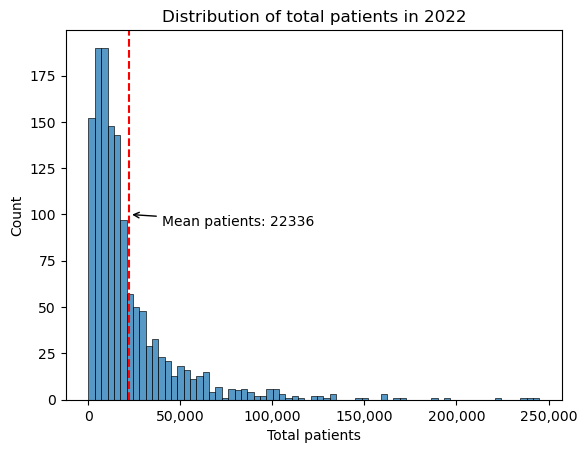

In [15]:
# plot distribution of patients served
fig, ax = plt.subplots()
sns.histplot(x='total_patients', data=health_centers)
plt.title('Distribution of total patients in 2022')
plt.xlabel('Total patients')

mean_patients = health_centers['total_patients'].mean()
plt.axvline(mean_patients, linestyle='--', color='r', label=f'Mean patients served: {mean_patients:.0f}')

# Adding text and arrow annotation
plt.annotate('Mean patients: {:.0f}'.format(mean_patients),
             xy=(mean_patients, 100),
             xycoords='data',
             xytext=(40000, 100),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             horizontalalignment='left',
             verticalalignment='top')


ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 

The total patients served is also heavily skewed to the right. Most health centers serve less than 20,000 patients per year with the mean being just over 22,000 patients per year. 

There are many outliers for this feature as well, with some as high as 100,000 patients per year and the max being just under 250,000 per year. 

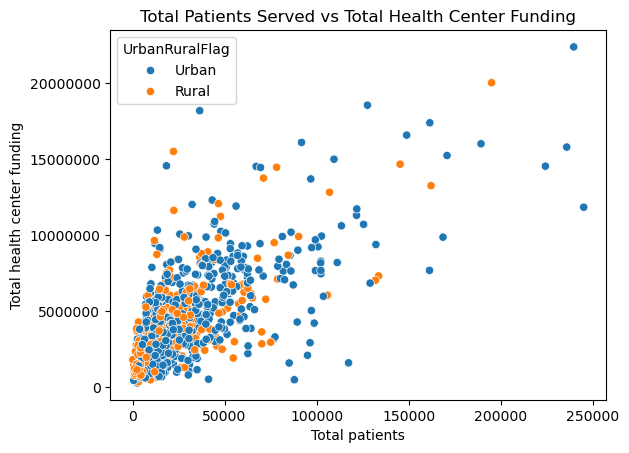

In [16]:
# scatter plot of health center funding vs total patients served
fix, ax = plt.subplots()

sns.scatterplot(x='total_patients', y='total_hc_funding', data=health_centers, hue='UrbanRuralFlag')
plt.title('Total Patients Served vs Total Health Center Funding')
plt.xlabel('Total patients')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

There is definitely a strong, positive correlation between funding received and patients served, however there are alo many outliers.  

There isn't an immediate relationship between urban vs rural health centers and funding. It is suprising to see that there are a few rural providers that serve significantly more patients than some urban providers. Additionally, we can see the outliers as far as those who serve an average number of patients but receive nearly twice as much funding as entities serving the same number of patients. I'll want to investigate this further with other features like other funding sources, social determinants of health in their patient populations, high need, and operational details. 

I want to take a look at the 10 health centers that receive the most funding. I want to compare this list to the top 10 health centers by patients served. 

In [17]:
top_funded = health_centers[['BHCMISID', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState','total_hc_funding', 'total_patients']]\
                    .sort_values('total_hc_funding', ascending=False).head(10)

top_funded['rank'] = range(1, len(top_funded) + 1)

In [18]:
top_patients = health_centers[['BHCMISID', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState', 'total_hc_funding', 'total_patients']]\
                    .sort_values('total_patients', ascending=False).head(10)

top_patients['rank'] = range(1, len(top_patients) + 1)

In [19]:
# top funded states
top_funded['HealthCenterState'].value_counts()

HealthCenterState
CA    3
NY    2
WA    1
MN    1
IL    1
CO    1
AL    1
Name: count, dtype: int64

In [20]:
# states with most patients served
top_patients['HealthCenterState'].value_counts()

HealthCenterState
CA    4
WA    2
NY    1
CO    1
IL    1
FL    1
Name: count, dtype: int64

It is interesting that states that have the most funding across entities in the top 10 are not necessarily the states that serve the most patients. We see that Alabama is one of the states with the most funding due to one organization, but is not in the top 10 for patients served. I want to take a look at these organizations more closely.

In [21]:
top_funded_vs_patients = top_funded.merge(top_patients, on='rank', suffixes=('_F', '_P'))
top_funded_vs_patients[['rank', 'HealthCenterName_F', 'HealthCenterName_P']]

rank                                 HealthCenterName_F  \
0     1                     HUDSON RIVER HEALTH CARE, INC.   
1     2                   YAKIMA VALLEY FARMWORKERS CLINIC   
2     3                               CLINICA SIERRA VISTA   
3     4  WEST SIDE COMMUNITY HEALTH SERVICES, INC. DBA ...   
4     5           FAMILY HEALTH CENTERS OF SAN DIEGO, INC.   
5     6                    SUNSET PARK HEALTH COUNCIL, INC   
6     7                                    SIHF HEALTHCARE   
7     8                 DENVER HEALTH & HOSPITAL AUTHORITY   
8     9                          FAMILY HEALTHCARE NETWORK   
9    10              QUALITY OF LIFE HEALTH SERVICES, INC.   

                              HealthCenterName_P  
0           ALTA MED HEALTH SERVICES CORPORATION  
1                 HUDSON RIVER HEALTH CARE, INC.  
2                      FAMILY HEALTHCARE NETWORK  
3                SEA-MAR COMMUNITY HEALTH CENTER  
4               YAKIMA VALLEY FARMWORKERS CLINIC  
5             DENVER HEALTH & HOSPITAL AUTHORITY  
6                ACCESS COMMUNITY HEALTH NETWORK  
7                               MCR HEALTH, INC.  
8  UNITED HLTH CNTRS OF SAN JOAQUIN VALLEY, INC.  
9       FAMILY HEALTH CENTERS OF SAN DIEGO, INC.

In [22]:
# calculate differences in funding and patients served between top funded and top patients
top_funded_vs_patients['funding_difference'] = top_funded_vs_patients['total_hc_funding_F'] - top_funded_vs_patients['total_hc_funding_P']
top_funded_vs_patients['patient_difference'] = top_funded_vs_patients['total_patients_F'] - top_funded_vs_patients['total_patients_P']
top_funded_vs_patients[['HealthCenterName_F', 'HealthCenterName_P', 'rank', 'funding_difference', 'patient_difference']]

HealthCenterName_F  \
0                     HUDSON RIVER HEALTH CARE, INC.   
1                   YAKIMA VALLEY FARMWORKERS CLINIC   
2                               CLINICA SIERRA VISTA   
3  WEST SIDE COMMUNITY HEALTH SERVICES, INC. DBA ...   
4           FAMILY HEALTH CENTERS OF SAN DIEGO, INC.   
5                    SUNSET PARK HEALTH COUNCIL, INC   
6                                    SIHF HEALTHCARE   
7                 DENVER HEALTH & HOSPITAL AUTHORITY   
8                          FAMILY HEALTHCARE NETWORK   
9              QUALITY OF LIFE HEALTH SERVICES, INC.   

                              HealthCenterName_P  rank  funding_difference  \
0           ALTA MED HEALTH SERVICES CORPORATION     1            10545167   
1                 HUDSON RIVER HEALTH CARE, INC.     2            -2355213   
2                      FAMILY HEALTHCARE NETWORK     3             2757398   
3                SEA-MAR COMMUNITY HEALTH CENTER     4             3649396   
4               YAKIMA VALLEY FARMWORKERS CLINIC     5            -2635820   
5             DENVER HEALTH & HOSPITAL AUTHORITY     6              569253   
6                ACCESS COMMUNITY HEALTH NETWORK     7              858362   
7                               MCR HEALTH, INC.     8             6143340   
8  UNITED HLTH CNTRS OF SAN JOAQUIN VALLEY, INC.     9             2538602   
9       FAMILY HEALTH CENTERS OF SAN DIEGO, INC.    10            -1883576   

   patient_difference  
0               -5438  
1              -44627  
2             -108224  
3             -187700  
4              -33511  
5              -40352  
6              -79031  
7               20640  
8               73702  
9             -139224

Although there is some overlap, health centers that serve more patients don't necessarily receive more health center grant funding. For example, Alta Med Health Services Corporation is the top patient serving health center and serves 5,438 more patients a year than the Hudson River Health Care, Inc, the entity that receives the most health center funding. Hudson River receives 10.5 million more per year than Alta Med. Additionally, Alta Med is actually not even in the top 10 funded health centers, despite serving the most patients. Similarly, Sea-Mar Community Health Center is the fourth largest health center in terms of patients served and is not in the top 10 most funded health centers. 

In [23]:
# count urban and rural providers
urb_rur = health_centers['UrbanRuralFlag'].value_counts().reset_index()
urb_rur['perc'] = urb_rur['count'] / urb_rur['count'].sum()
urb_rur

UrbanRuralFlag  count      perc
0          Urban    794  0.590774
1          Rural    550  0.409226

In [24]:
funding_grouping = health_centers.groupby('UrbanRuralFlag')['total_hc_funding'].sum().reset_index()
funding_grouping['perc_of_total_funding'] = (funding_grouping['total_hc_funding'] / funding_grouping['total_hc_funding'].sum())
funding_grouping

UrbanRuralFlag  total_hc_funding  perc_of_total_funding
0          Rural        1750575733                0.35515
1          Urban        3178537861                0.64485

Most entities are urban providers, however, there is still a significant number of rural providers. Although urban providers only represent 58.7% of the total number of entities, they receive 64.1% of the total available health center funding. Rural providers represent 41.3% of the total number of providers and receive 35.9% of the funding. 

## Funding Streams 

I want to take a closer look at non-patient revenue streams and any interesting trends.

In [25]:
health_centers[['total_hc_funding',
       'bphc_total', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants',
       'total_private_grants', 'total_other_revenue', 'total_revenue']].describe().apply(lambda x: x.apply('{0:.2f}'.format)).T

count         mean          std        min  \
total_hc_funding            1344.00   3667495.23   2740681.38  275778.00   
bphc_total                  1344.00   6085657.41   5110199.29  358149.00   
total_other_federal_grants  1344.00    442495.58   1286410.96       0.00   
total_state_grants          1344.00    774911.17   1623688.59       0.00   
total_local_gov_grants      1344.00    663381.71   2402896.28       0.00   
total_private_grants        1344.00    801449.59   1630209.79       0.00   
total_other_revenue         1344.00   1101676.08  11781542.00       0.00   
total_revenue               1344.00  10559958.72  17176688.29  828062.00   

                                   25%         50%          75%           max  
total_hc_funding            1803810.00  2856994.50   4602146.75   22382349.00  
bphc_total                  2965859.25  4551398.50   7329947.75   48065368.00  
total_other_federal_grants        0.00        0.00    247370.25   13597206.00  
total_state_grants                0.00   184925.00    768676.25   19982632.00  
total_local_gov_grants            0.00        0.00    300875.25   48056004.00  
total_private_grants          15240.00   218485.50    882567.25   22007477.00  
total_other_revenue           15016.25   136443.50    546087.75  415573508.00  
total_revenue               4121773.00  6686165.00  12417403.00  485335878.00

Most organizations do not receive other federal grants or local government grants. Many do receive state and private funding as well as other revenue.

Some organizations also have significantly larger operations, as can be seen by the maximum values for total other revenue 415,573,508.00 and total revenue 485,335,878.00 compared to the medians for these measures, 134,991.50 and 6,656,907.00 respectively. It may be worth grouping entities by their opeartional sizes given revenue and patient populations. 

I'm interested to know the total health center funding as a proportion of total non-patient revenue. I also want to see the health center funding as a proportion of total grant funding.

After gathering some new summary data, I will drop the detailed breakdown of grant funding type to reduce the number of columns. I will preserve information about health center funding, other revenue, and total revenue. Before dropping columns, I will look at pairplots for these values.

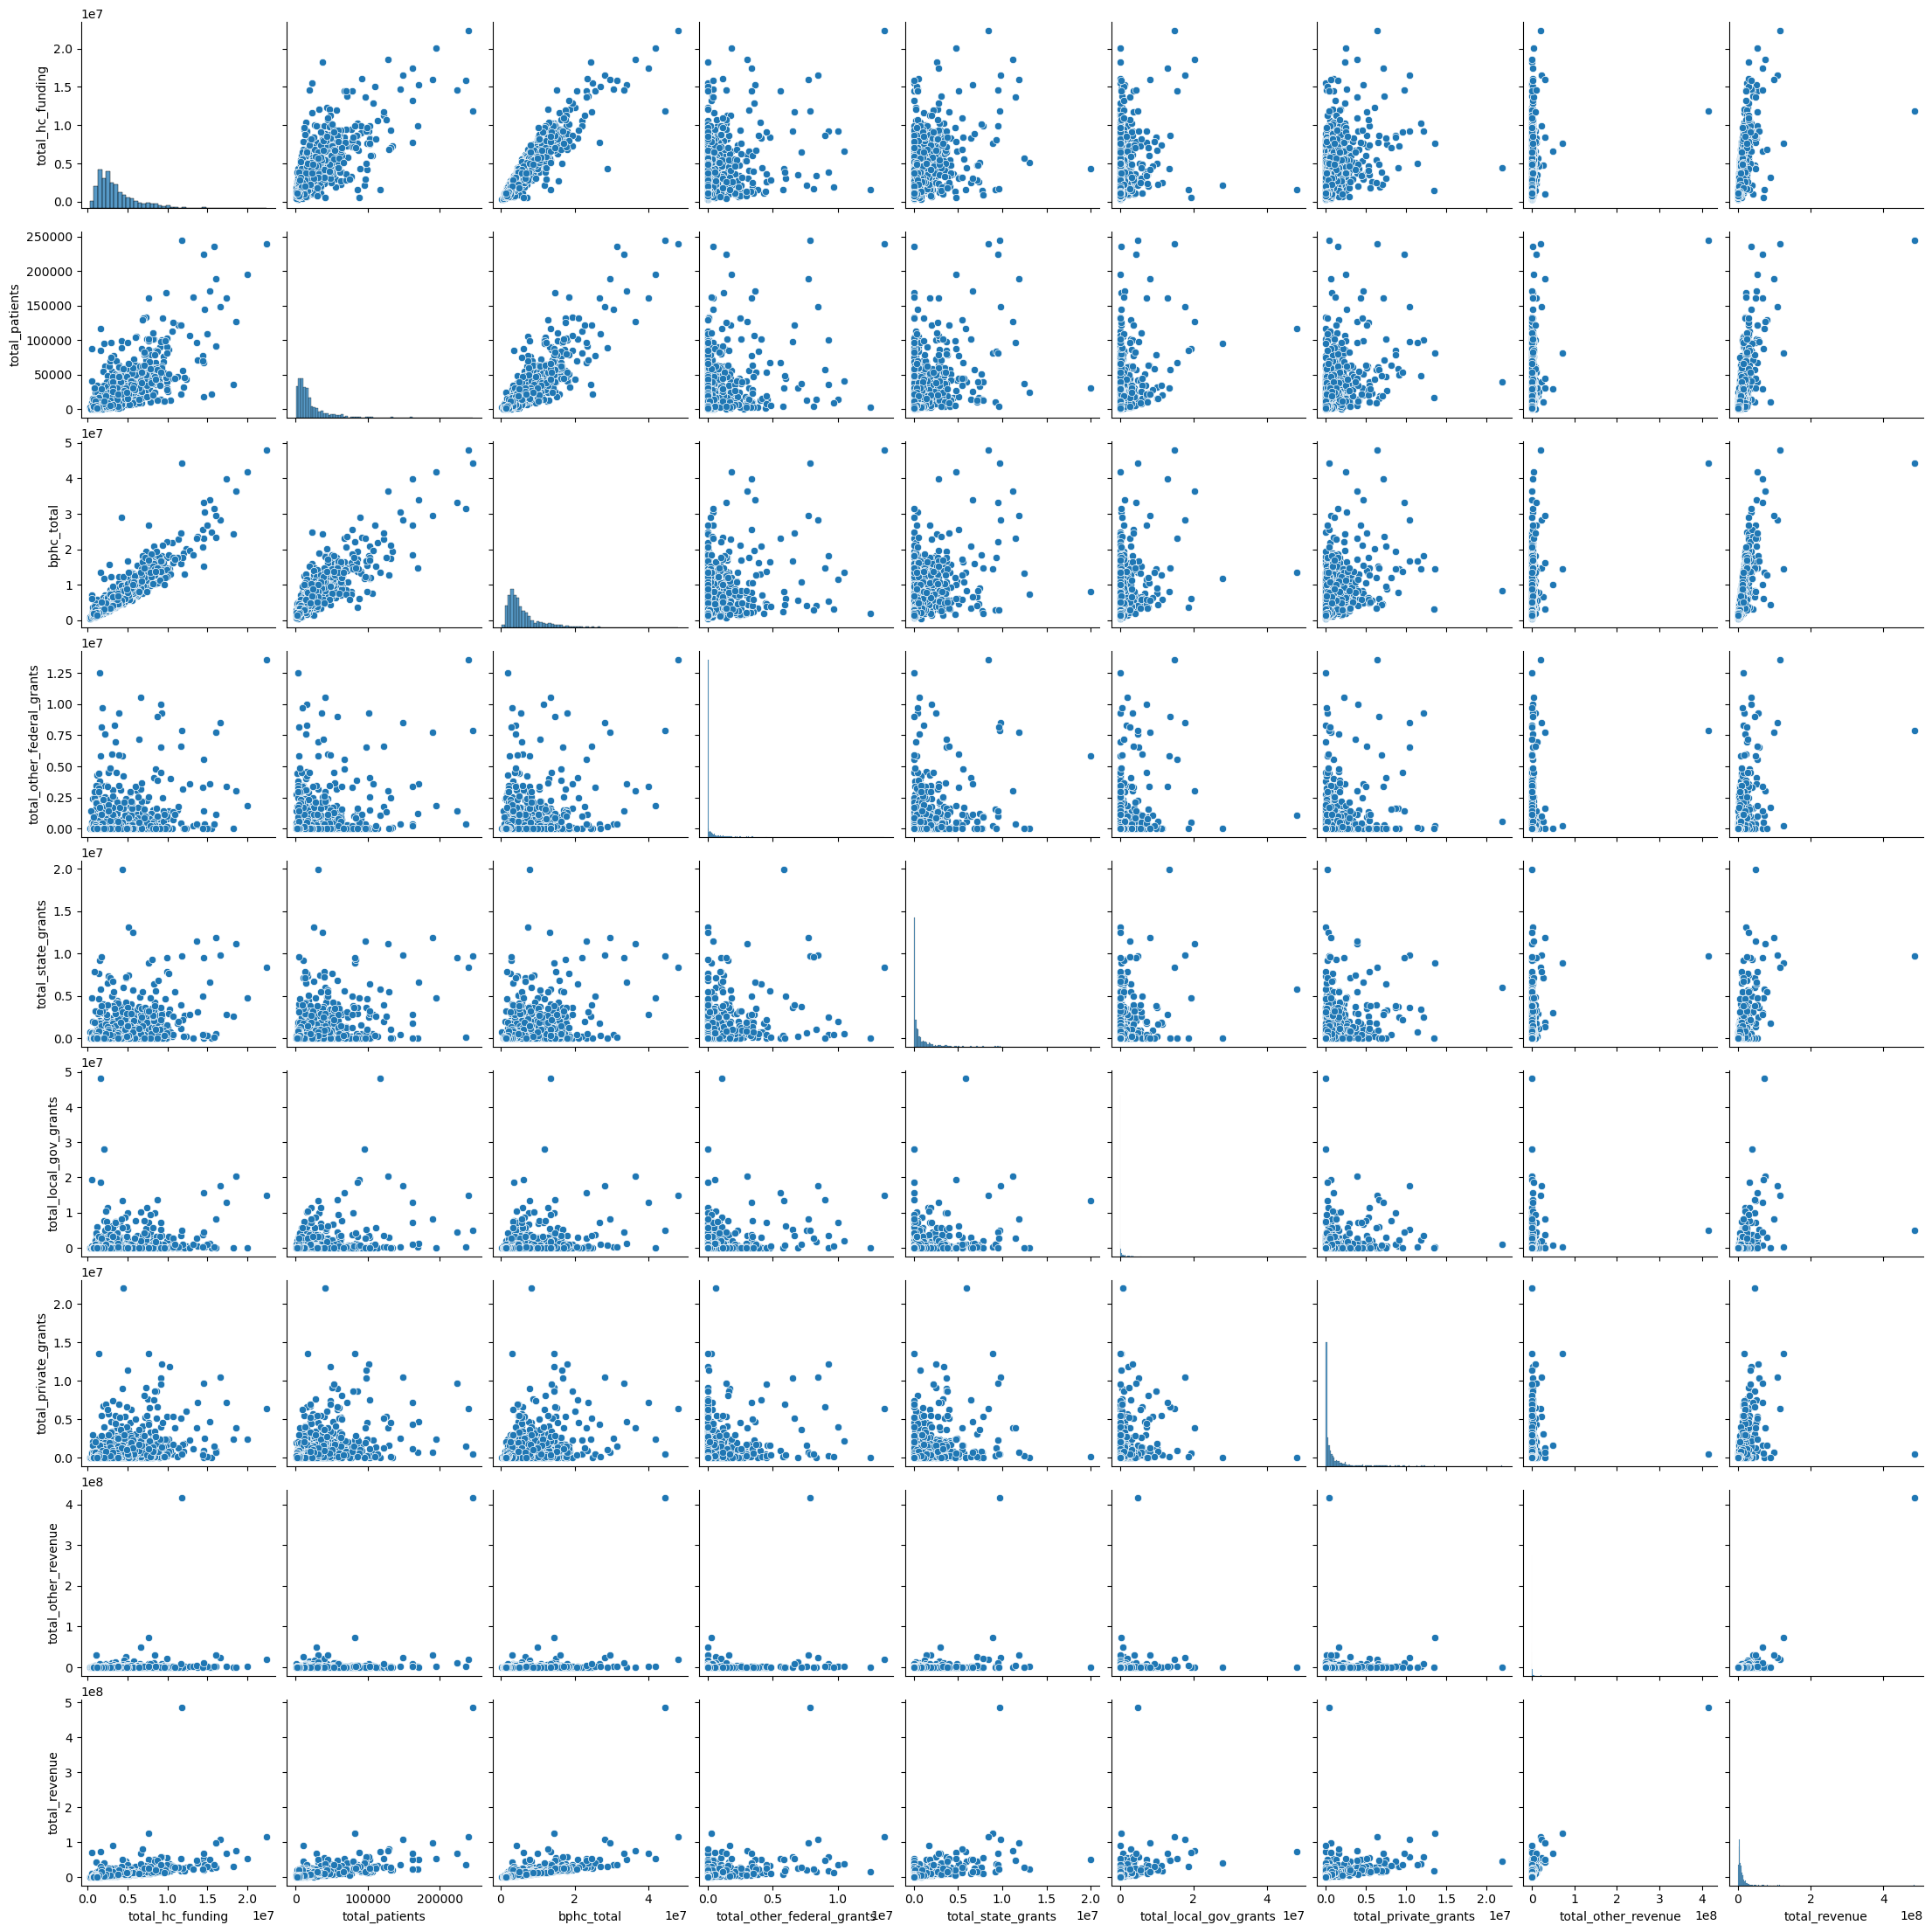

In [26]:
non_patient_funding = health_centers[['total_hc_funding', 'total_patients',
       'bphc_total', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants',
       'total_private_grants', 'total_other_revenue', 'total_revenue']]

sns.pairplot(non_patient_funding)

There are clearly a few outliers in terms of funding that seem to have significantly more other revenue, total revenue, and other grants compared to the vast majority of providers. 

There are some overall positive trends between total revenue and total health center funding. Additionally, there is strong correlation between health center funding and bphc funding, however this is not surprising at health center funding is a type of bphc funding organizations could have. 

I want to look at funding proportions to see the size of the role health center funding plays in these organization's operations. Does health center funding make up most of the total non-patient revenue? Are other funding streams more significant?

In [27]:
# calculate health center funding as a proportion of total revenue
health_centers['hc_grant_revenue_ratio'] = health_centers['total_hc_funding'] / health_centers['total_revenue']

# calculate health center funding as a proportion of all grant funding
cols_to_sum = ['bphc_total', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants', 'total_private_grants']
health_centers['total_grant_funding'] = health_centers[cols_to_sum].sum(axis=1)
health_centers['hc_other_grants_ratio'] = health_centers['total_hc_funding'] / health_centers['total_grant_funding']

# calculate total grant funding as a proportion of total revenue
health_centers['grants_to_rev_ratio'] = health_centers['total_grant_funding'] / health_centers['total_revenue']


In [28]:
# drop detailed grant type columns
health_centers.drop(columns=cols_to_sum, inplace=True)

In [29]:
# display information about ratios
health_centers[['hc_grant_revenue_ratio', 'hc_other_grants_ratio', 'grants_to_rev_ratio']].describe()

hc_grant_revenue_ratio  hc_other_grants_ratio  grants_to_rev_ratio
count             1344.000000            1344.000000          1344.000000
mean                 0.449881               0.494703             0.904965
std                  0.180553               0.179487             0.129525
min                  0.006886               0.015549             0.085569
25%                  0.319082               0.372381             0.873089
50%                  0.447711               0.493274             0.949028
75%                  0.576788               0.619249             0.988162
max                  1.000000               1.000000             1.000000

Text(0.5, 0, 'Ratio')

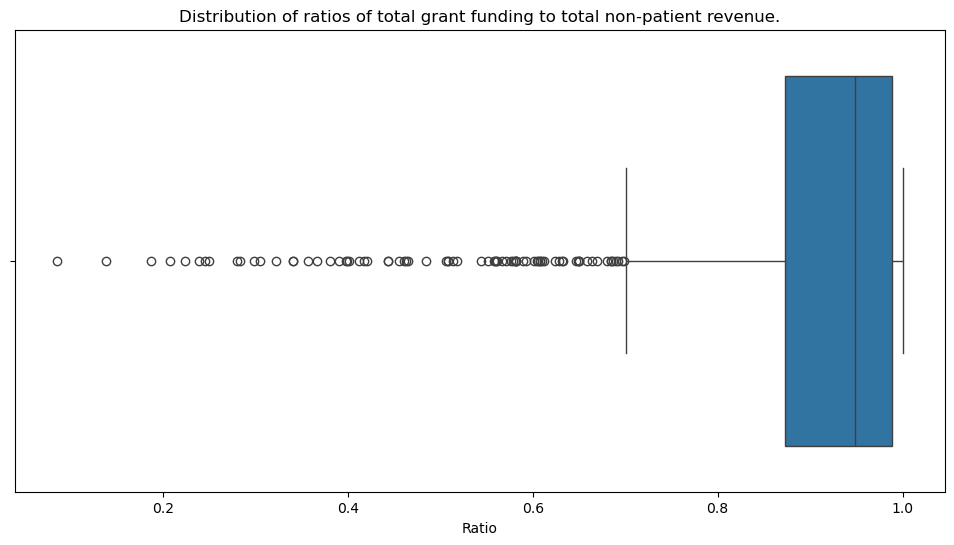

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Distribution of ratios of total grant funding to total non-patient revenue.')
sns.boxplot(x='grants_to_rev_ratio', data=health_centers)

plt.xlabel('Ratio')

For the majority of health centers, grant funding makes up between 85% to 99% of their total non-patient revenue. There are several outliers however where grant funding does not even make up 70% of their non-patient revenue. I want to look at their other revenue to total non-patient revenue.

Other revenue includes revenue that is unrelated to charge- based services or to grants. This includes things like fundraising, interest revenue, rent from tenants, patient health records fees, individual monetary donations, receipts from vending machines, retail pharmacy sales to the public (i.e., non–health center patients), and gains on the sale of an asset.

Text(0.5, 0, 'Ratio')

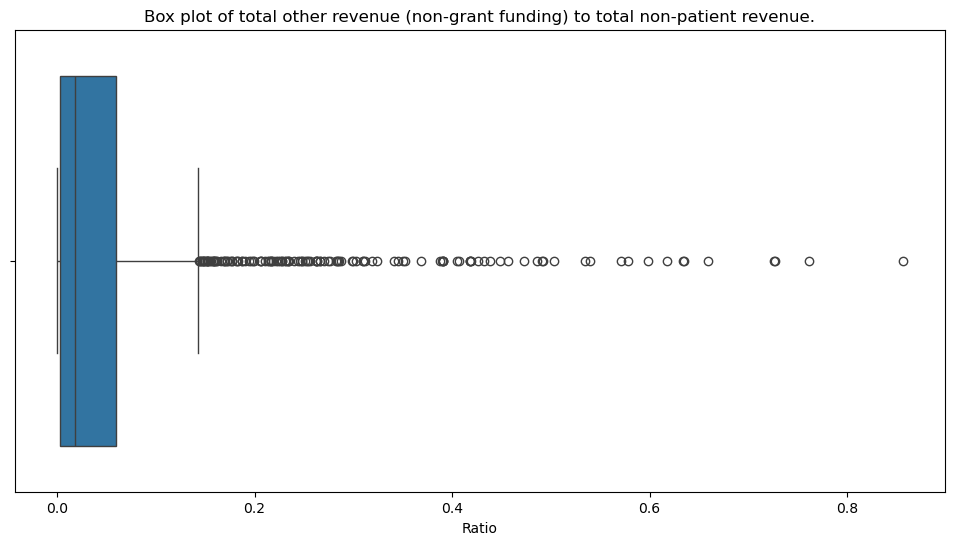

In [31]:
# calculate total other revenue  as a proportion of total revenue
health_centers['other_to_rev_ratio'] = health_centers['total_other_revenue'] / health_centers['total_revenue']

fig, ax = plt.subplots(figsize=(12,6))

plt.title('Box plot of total other revenue (non-grant funding) to total non-patient revenue.')
sns.boxplot(x='other_to_rev_ratio', data=health_centers)

plt.xlabel('Ratio')

In [32]:
health_centers[['HealthCenterName', 'total_other_revenue', 'total_grant_funding', 'total_patients']].sort_values('total_other_revenue', ascending=False).head(20)

HealthCenterName  total_other_revenue  \
1122           ALTA MED HEALTH SERVICES CORPORATION          415573508.0   
23           EAST BOSTON NEIGHBORHOOD HEALTH CENTER           71967719.0   
8                            HARBOR HEALTH SERVICES           49539088.0   
329                  PIEDMONT HEALTH SERVICES, INC.           30738920.0   
293                           PHILADELPHIA, CITY OF           30576676.0   
964              DENVER HEALTH & HOSPITAL AUTHORITY           29785969.0   
33        BOSTON HEALTH CARE FOR THE HOMELESS, INC.           26609467.0   
135                 SUNSET PARK HEALTH COUNCIL, INC           22912139.0   
130              COMMUNITY HEALTHCARE NETWORK, INC.           21321355.0   
126                  HUDSON RIVER HEALTH CARE, INC.           19870205.0   
384                   CAROLINA HEALTH CENTERS, INC.           16845220.0   
0                       HOLYOKE HEALTH CENTER, INC.           14258919.0   
791              STIGLER HEALTH AND WELLNESS CENTER           11973859.0   
642                LAWNDALE CHRISTIAN HEALTH CENTER           10702594.0   
1259                SEA-MAR COMMUNITY HEALTH CENTER           10045410.0   
248   THREE LOWER COUNTIES COMMUNITY SERVICES, INC.            9902838.0   
548                BALDWIN FAMILY HEALTH CARE, INC.            9384678.0   
71                     RICHFORD HEALTH CENTER, INC.            9174828.0   
810          LEGACY COMMUNITY HEALTH SERVICES, INC.            9160662.0   
144                 THE INSTITUTE FOR FAMILY HEALTH            8814641.0   

      total_grant_funding  total_patients  
1122           67232193.0          245012  
23             37623448.0           81886  
8              15264738.0           29114  
329            18959681.0           44655  
293            10535233.0           30555  
964            58036533.0          189225  
33             18373296.0           10174  
135            74569426.0          148873  
130            31149411.0           39938  
126            91290264.0          239574  
384             9474016.0           25770  
0              11833740.0           19144  
791            12821278.0           30571  
642            21397368.0           53331  
1259           58364707.0          224180  
248             8449759.0           55318  
548             9687454.0           23217  
71              4740621.0           17781  
810            40624125.0          161254  
144            45427229.0          100697

Alta Med is a clear outlier, brining in nearly 6x more other revenue compared to the health center that brings in the 2nd most other revenue, East Boston Neighborhood Health Center. This could explain why their health center funding is so low compared to similarly other large health centers. 

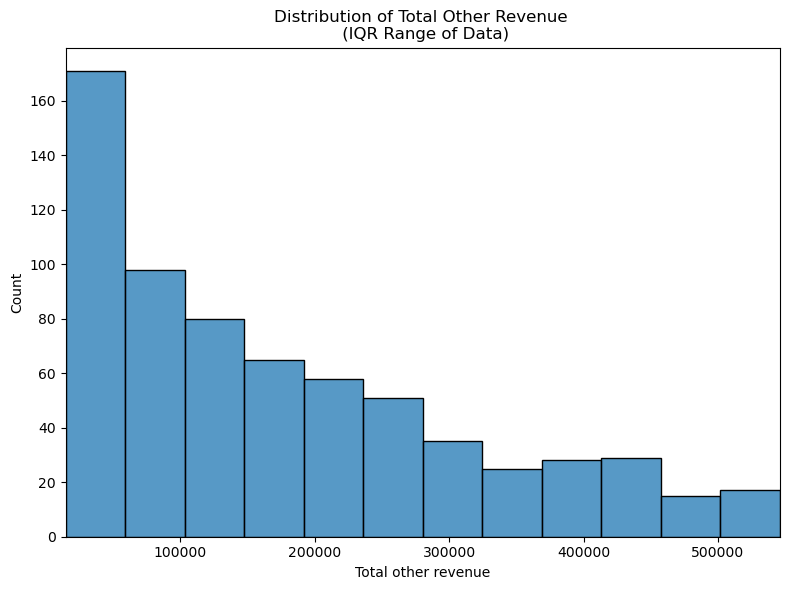

In [33]:
# distribution of total other revenue
other_rev = health_centers[(health_centers['total_other_revenue'] <= np.quantile(health_centers['total_other_revenue'], .75)) \
                           & (health_centers['total_other_revenue'] >= np.quantile(health_centers['total_other_revenue'], .25))]

fig, ax = plt.subplots(figsize=(8,6))

# Plotting low other revenue data
sns.histplot(other_rev['total_other_revenue'], ax=ax)
ax.set_xlim(left=other_rev['total_other_revenue'].min(), right=other_rev['total_other_revenue'].max())
ax.ticklabel_format(style='plain', axis='both')
ax.set_title('Distribution of Total Other Revenue \n (IQR Range of Data)')
ax.set_xlabel('Total other revenue')

plt.tight_layout()
plt.show()


In [34]:
# Define bins
bin_edges = [0, 1, 100000, 1000000, 30000000, float('inf')]  # Use float('inf') for the upper edge

# labels
bin_labels = ['None', 'Less than 100K', '100K to 1M', '1M to 30M', 'Over 30M']

# create cat column
health_centers['other_revenue_category'] = pd.cut(health_centers['total_other_revenue'], bins=bin_edges, labels=bin_labels, right=False)

health_centers[['total_other_revenue', 'other_revenue_category']].head()

total_other_revenue other_revenue_category
0           14258919.0              1M to 30M
1              36578.0         Less than 100K
2             270649.0             100K to 1M
3            1753132.0              1M to 30M
4                  0.0                   None

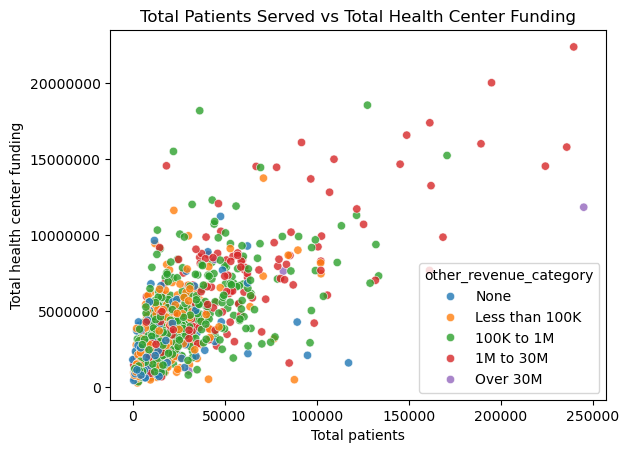

In [35]:
# scatter plot of health center funding vs total patients served
fix, ax = plt.subplots()

sns.scatterplot(x='total_patients', y='total_hc_funding', data=health_centers, hue='other_revenue_category', alpha=0.8)
plt.title('Total Patients Served vs Total Health Center Funding')
plt.xlabel('Total patients')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

The larger health centers become, the more diversified their revenue streams appear. As some health centers increase in patient size, they seem to be more likely to have larger amounts of funding coming from other non-patient and non-grant revenue streams. However, we did see in the table earlier that this is not always the case. Some health centers that have massive amounts of total other revenue, like East Boston Neighborhood Health Center only serve a small number of patients, just over 80,000 in their case. 

Let's look at patient revenue and operations.

In [36]:
funding = health_centers[['total_patients', 
                'total_hc_funding',
                'total_charges', 
                'total_collected', 
                'total_sfs']]

In [37]:
funding.describe().apply(lambda x: x.apply('{0:.2f}'.format))

total_patients total_hc_funding total_charges total_collected  \
count        1344.00          1344.00        731.00          731.00   
mean        22335.50       3667495.23   28809241.08     18606310.28   
std         27461.40       2740681.38   48427475.27     32247948.47   
min           154.00        275778.00       7314.00            0.00   
25%          6972.50       1803810.00    6590144.00      4021280.50   
50%         13570.00       2856994.50   15203919.00      9502344.00   
75%         26196.75       4602146.75   31945650.50     21434937.00   
max        245012.00      22382349.00  672511973.00    525686359.00   

         total_sfs  
count       731.00  
mean    2460668.32  
std     5448498.94  
min           0.00  
25%      247277.50  
50%      837545.00  
75%     2282510.00  
max    64698474.00

I'm interested to look at the entity or entities that have 0 sliding fee scale discounts. Health centers are mandated to offer services on a sliding fee scale by law, so it is curious why there would be an entity that says 0 sfs discounts provided. 

In [38]:
no_sfs = health_centers[health_centers['total_sfs'] == 0][['HealthCenterName', 'total_hc_funding']]
print(no_sfs.shape)
no_sfs

(7, 2)


HealthCenterName  total_hc_funding
528   RECOVERY CONSULTANTS OF ATLANTA, INCORPORATED           1246352
728        LUTHERAN SOCIAL SERVICES OF CENTRAL OHIO           1369045
970             COLORADO COALITION FOR THE HOMELESS           9178083
1000       COMMUNITY ACTION OF LARAMIE COUNTY, INC.            438893
1130             MINISTRY OF HEALTH AND ENVIRONMENT            653252
1257                           MANILLAQ ASSOCIATION           2944978
1342      CHUUK STATE DEPARTMENT OF HEALTH SERVICES            792000

There are 7 organizations that did not report any sliding fee scale discount charges. I wanted to see if maybe this was because they are brand new entities. I looked up the first three organizations and they do say they offer sliding fee scales at their organizations. I am not sure why 0 would be lsited for these entities. 

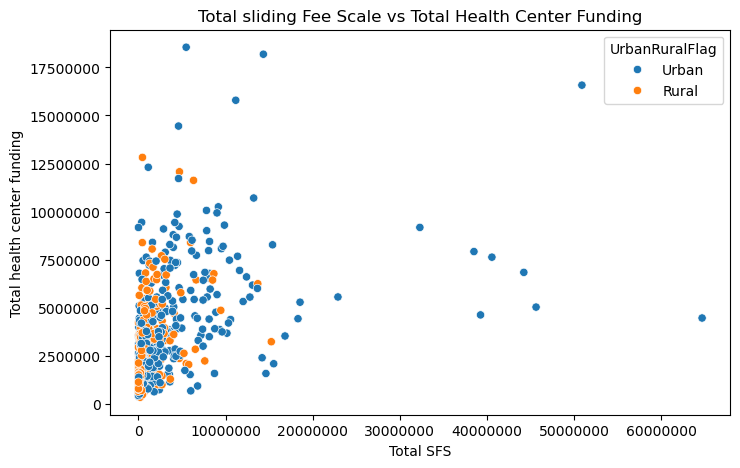

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=health_centers, x='total_sfs', y='total_hc_funding', hue='UrbanRuralFlag', ax=ax)
plt.title('Total sliding Fee Scale vs Total Health Center Funding')
plt.xlabel('Total SFS')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

Urban entities seem to provide more sliding fee scale services compared to rural entities, even though some rural entities receive more health center funding compared to the urban entities. 

Let's look at charges vs collections

In [40]:
health_centers['collections_charges_ratio'] = health_centers['total_collected'] / health_centers['total_charges']

In [41]:
health_centers[['HealthCenterName', 'collections_charges_ratio']].sort_values('collections_charges_ratio', ascending=False).head(25)

HealthCenterName  \
1336                     N. A. T. I. V. E. PROJECT, THE   
1254                                  WHITE BIRD CLINIC   
1197                               GREENVILLE RANCHERIA   
1274           CLACKAMAS COUNTY HEALTH CENTERS DIVISION   
1042          COUNTY OF SACRAMENTO DOH & HUMAN SERVICES   
1322                                        LANE COUNTY   
1308                                     MOSAIC MEDICAL   
1268             VIRGINIA GARCIA MEMORIAL HEALTH CENTER   
1273                                        HEALTHPOINT   
1091                          KARUK TRIBE OF CALIFORNIA   
308                                   CITY OF FREDERICK   
1020         COMMUNITY HEALTH CARE CENTER, INCORPORATED   
557            FAMILY HEALTH CENTER OF MARSHFIELD, INC.   
1093                                   COUNTY OF SOLANO   
1276           LINCOLN COUNTY HEALTH AND HUMAN SERVICES   
237               KEYSTONE RURAL HEALTH CONSORTIA, INC.   
1315                                         OUTSIDE IN   
1178                          ACHIEVABLE FOUNDATION THE   
1299                       COWLITZ FAMILY HEALTH CENTER   
1129                            NEIGHBORHOOD HEALTHCARE   
1046                                  SANTA CRUZ COUNTY   
635   VALLEY PROFESSIONALS COMMUNITY HEALTH CENTER, ...   
931                              ALL CARE HEALTH CENTER   
1266                              YAKUTAT TLINGIT TRIBE   
1296             SEATTLE-KING COUNTY PUBLIC HEALTH DEPT   

      collections_charges_ratio  
1336                   2.862926  
1254                   2.635001  
1197                   2.075171  
1274                   1.681848  
1042                   1.623509  
1322                   1.607073  
1308                   1.548311  
1268                   1.510768  
1273                   1.486528  
1091                   1.485061  
308                    1.332890  
1020                   1.307309  
557                    1.290922  
1093                   1.277720  
1276                   1.268251  
237                    1.252436  
1315                   1.228966  
1178                   1.226378  
1299                   1.188100  
1129                   1.172606  
1046                   1.171129  
635                    1.169752  
931                    1.157401  
1266                   1.137016  
1296                   1.129052

I'm not sure how to interpret the results of the collections to charges ratio. Health centers should not be collecting more per visit than what is charged. The overage may be due to collecting on charges made in a previous year. I will drop this new column due to insufficient understanding of the data.

In [43]:
health_centers.drop(columns=['collections_charges_ratio', 'total_collected','total_charges'], inplace=True)

## Social Determinants of Health 

I want to look how and if social determinant of health and funding is correlated. Health centers are supposed to increase access to care for vulnerable populations. Do entities that serve more vulnerable populations receive more funding? Which SDOH impact funding the most?

**Financial Insecurity**

First I will take a look at total number of people served at or below 100% Federal Poverty Level. Financial barriers to care is one of the most pressing challenges to address in access to care. I would think this heavily influences total health center funding. 

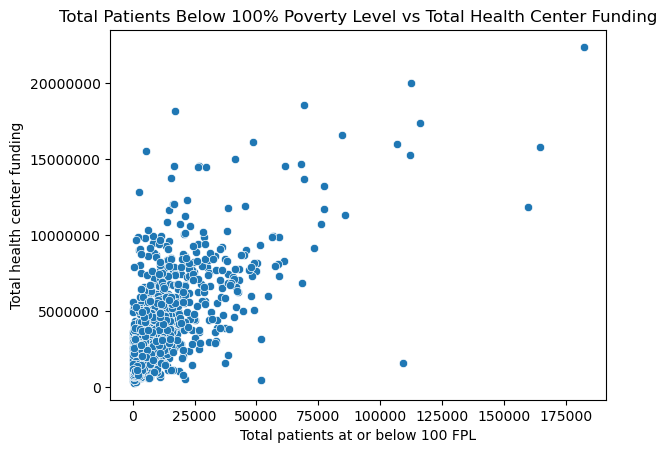

In [37]:
fix, ax = plt.subplots()

sns.scatterplot(x='fpl_100_below', y='total_hc_funding', data=health_centers)
plt.title('Total Patients Below 100% Poverty Level vs Total Health Center Funding')
plt.xlabel('Total patients at or below 100 FPL')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

It apeears that the entity that receives the most health center funding also serves the greatest number of patients at or below 100% federally poverty level. They serve over 175,000 patiets with high financial barriers to care. 

Several other outlier entities also receive a lot of funding for high number of financially insecure individuals. However, there are also quite a few entities that receive high amount of funding and do not serve that many financial insecure patients by comparison.

I am going to use Plotly so I can make this scatter plot more interactive to see which intities they are. 

In [38]:
df = health_centers
fig = px.scatter(df, x='fpl_100_below', y='total_hc_funding', hover_data='HealthCenterName', 
                 size='total_patients', 
                 title = "Total patients at or below 100% FPL vs Health center funding", 
                 width=800, height=600)
fig.show()

We see that Hudson is the entity that provides the most in terms of care to people at or below 100% federal poverty level, serving 182.3K patients in 2022. 

**Racial and Ethnic Minorities**

Race and ethnicity are two other factors that largely influence individuals' access to care. This is largely due to historical and systemic racism in the United States. Although we will not be examining how this influences access to care at an individual level, I want to see if it does impact the funding levels for organizations. Specifically, do organizations that serve higher proportions of racial and ethnic diversity receive more funding?

We are going to need to aggregate the race columns into a new racial diversity column which will exclude white, hispanic any race and unreported. We are exclusing hispanic any race since this is an ethnicity. Also, patients represented as hispanic could also be counted as a race, so we don't want to double count them. 

Because some health centers serve a lot more patients that others, I will also want to calculate these as proportions for analysis. 

In [39]:
# identify columns to aggregate
race_cols_agg = ['asian', 'native_hawaiian', 'pac_isl', 'black', 'am_ind']

# sum up these results
health_centers['diverse_patients_sum'] = health_centers[race_cols_agg].sum(axis=1)

# calculate the proportion of total patients that are diverse
health_centers['diverse_race_proportion'] = health_centers['diverse_patients_sum'] / health_centers['total_patients']
health_centers['hispanic_proportion'] = health_centers['hispanic_any_race'] / health_centers['total_patients']

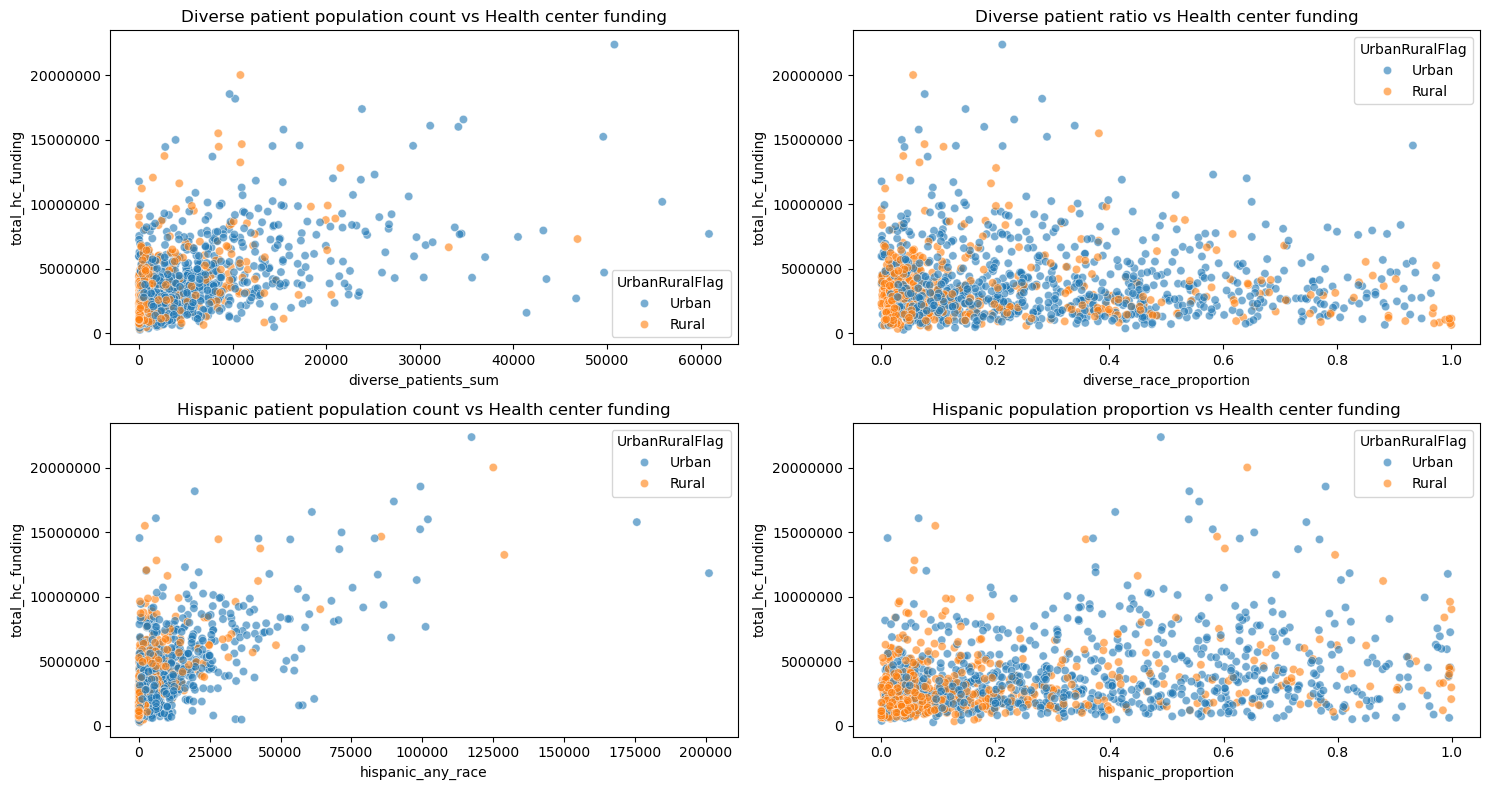

In [40]:
fit, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

ax[0,0] = sns.scatterplot(x='diverse_patients_sum', y='total_hc_funding', data=health_centers, ax=ax[0,0], hue='UrbanRuralFlag', alpha=0.6)
ax[0,0].set_title('Diverse patient population count vs Health center funding')
ax[0,0].ticklabel_format(style='plain', axis='both')


ax[0,1] = sns.scatterplot(x='diverse_race_proportion', y='total_hc_funding', data=health_centers, ax=ax[0,1], hue='UrbanRuralFlag', alpha=0.6)
ax[0,1].set_title('Diverse patient ratio vs Health center funding')
ax[0,1].ticklabel_format(style='plain', axis='both')

ax[1,0] = sns.scatterplot(x='hispanic_any_race', y='total_hc_funding', data=health_centers, ax=ax[1,0], hue='UrbanRuralFlag', alpha=0.6)
ax[1,0].set_title('Hispanic patient population count vs Health center funding')
ax[1,0].ticklabel_format(style='plain', axis='both')

ax[1,1] = sns.scatterplot(x='hispanic_proportion', y='total_hc_funding', data=health_centers, ax=ax[1,1], hue='UrbanRuralFlag', alpha=0.6)
ax[1,1].set_title('Hispanic population proportion vs Health center funding')
ax[1,1].ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()


There does not appear to be any clear relationship between either proportion of racially or ethnically diverse patients and total health center funding. However, there appears to be a positive correlation between the number of racially or ethnically diverse patients served and total health center funding. This shows that the number of patients served is more important than the proportion who are racially or ethnically diverse. 

In [41]:
# drop columns
health_centers.drop(columns=(race_cols_agg), inplace=True)
health_centers.drop(columns=['white', 'unreported'], inplace=True)

Okay, I want to get a brief overview of any relationship the other social determinants of health may have to total health center funding. I will quickly visualize them as scatter plots. Several of these features may make more sense to aggregate, such as the various insurance groupings. 

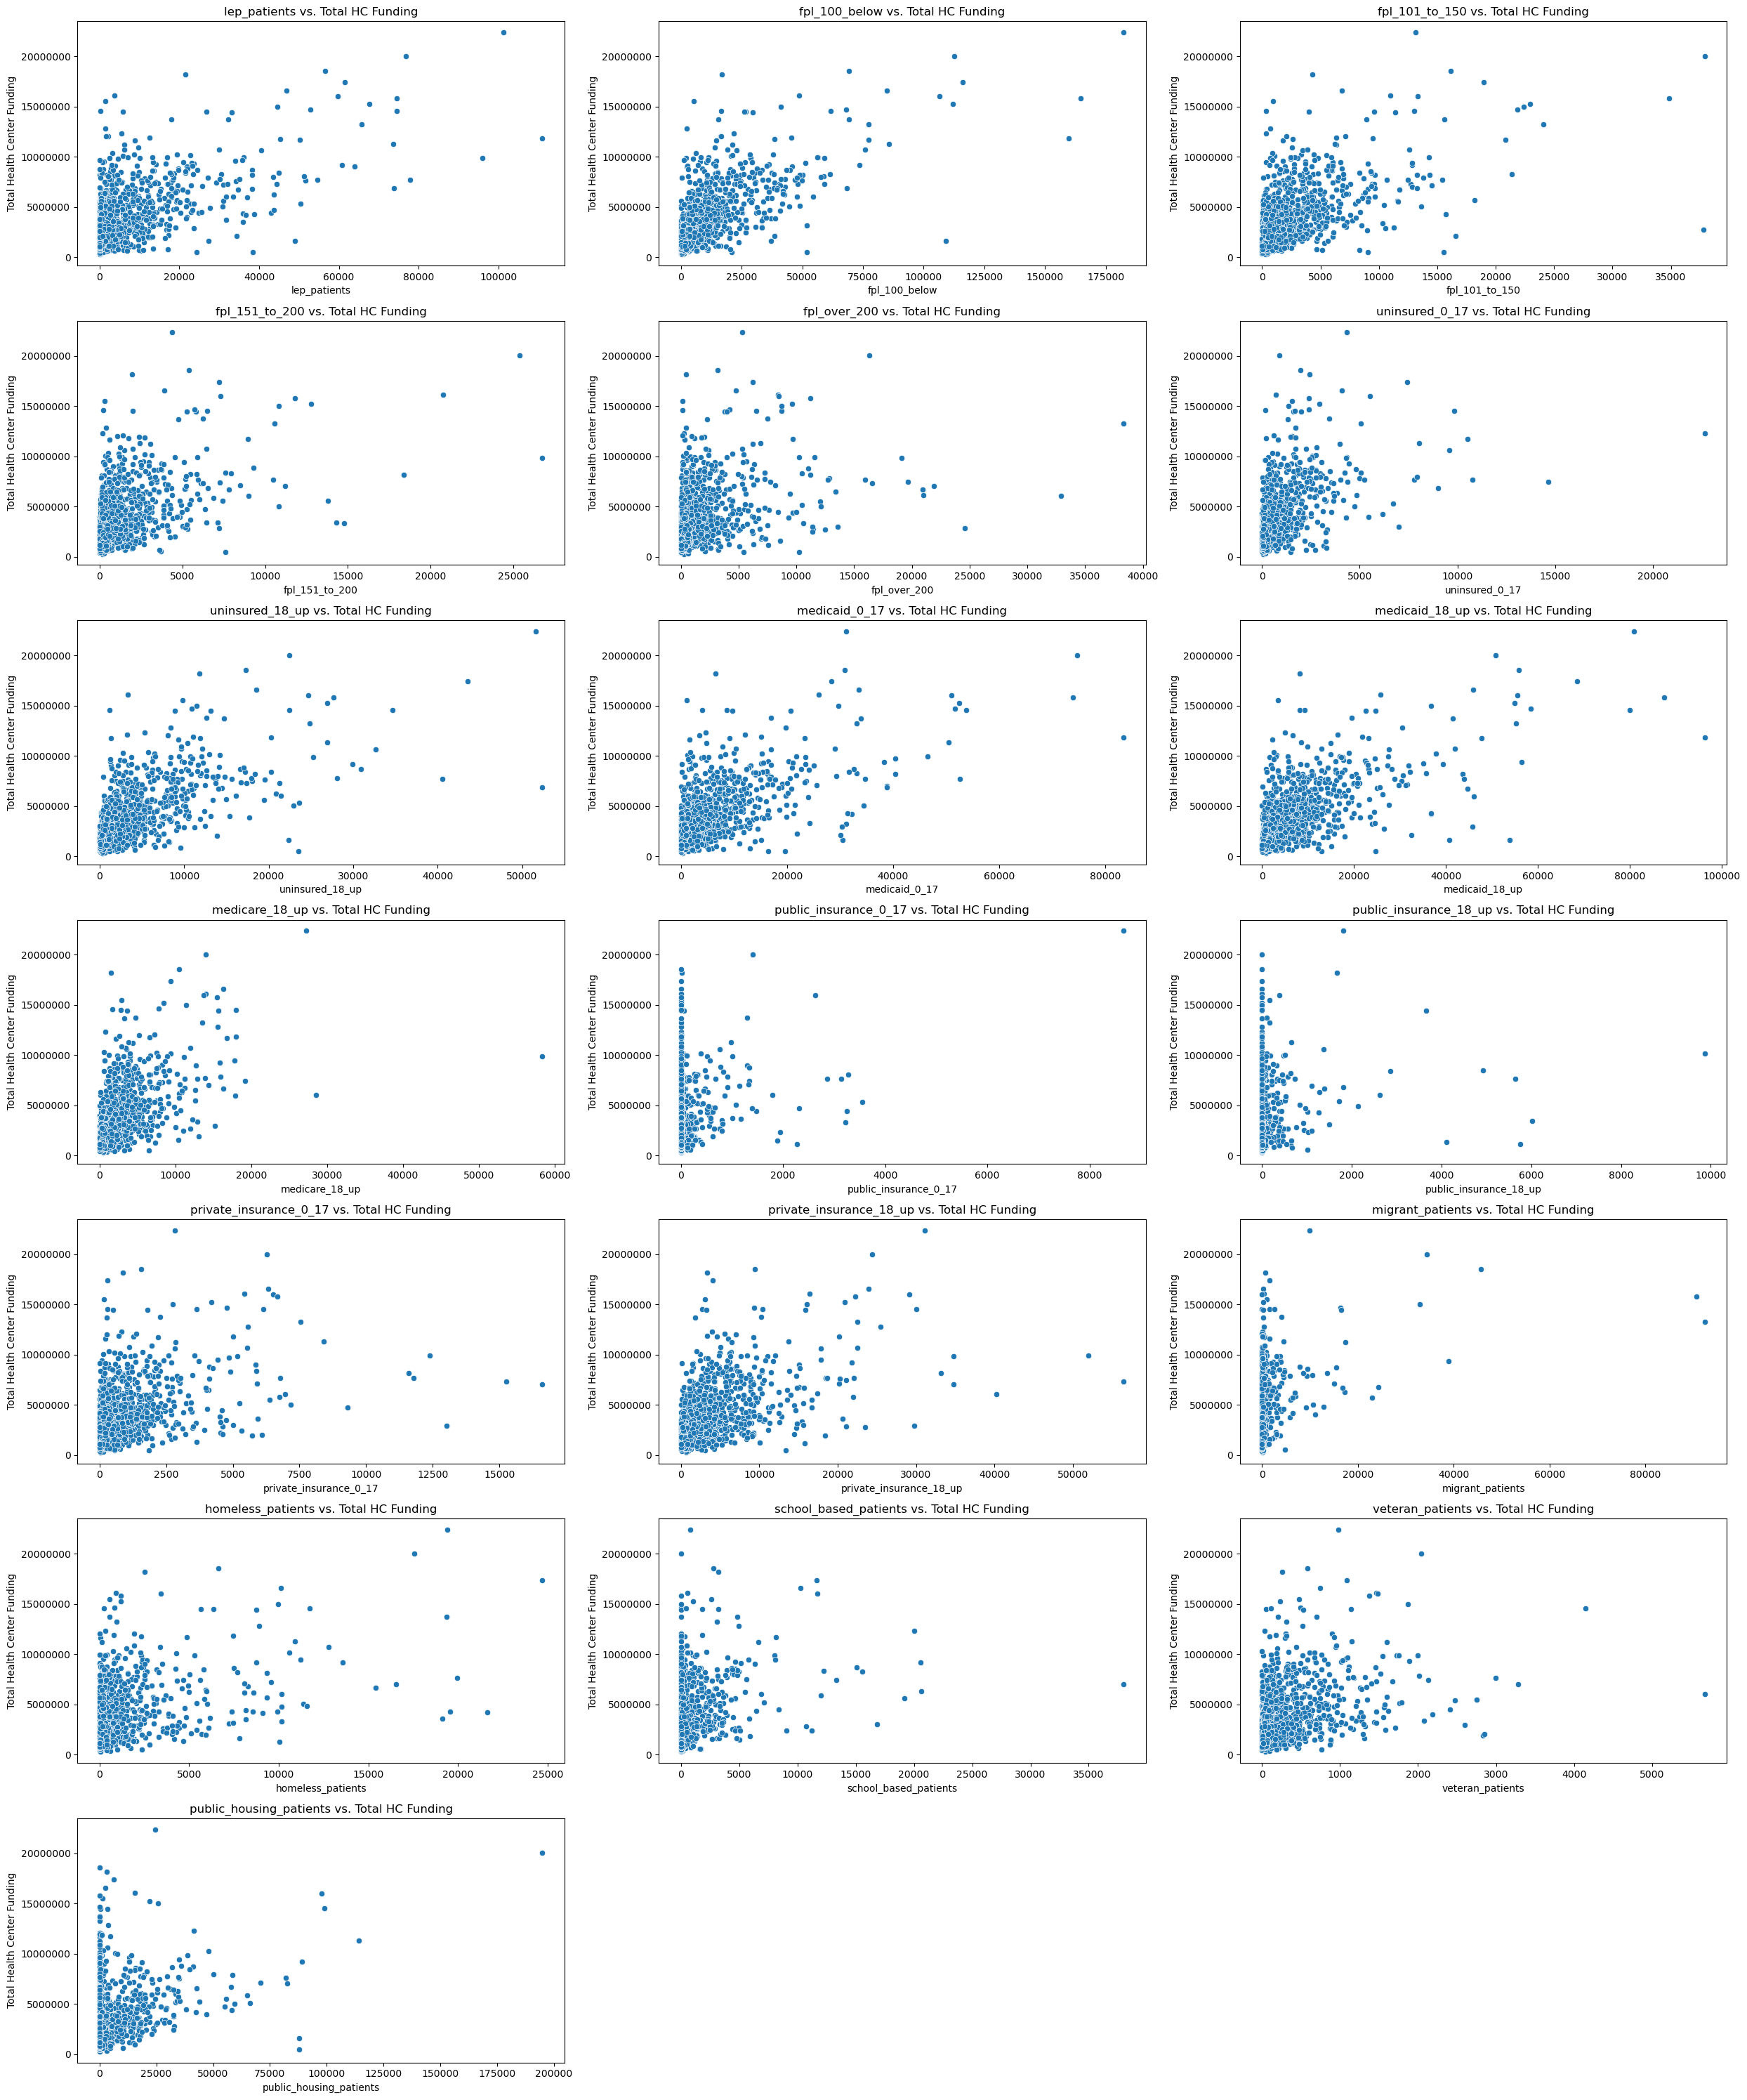

In [42]:
# Define the list of x variables you want to plot against 'total_hc_funding'
sdoh_vars = [
    'lep_patients', 'fpl_100_below', 'fpl_101_to_150', 'fpl_151_to_200', 'fpl_over_200',
    'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17', 'medicaid_18_up',
    'medicare_18_up', 'public_insurance_0_17', 'public_insurance_18_up',
    'private_insurance_0_17', 'private_insurance_18_up',
    'migrant_patients', 'homeless_patients', 'school_based_patients',
    'veteran_patients', 'public_housing_patients'
]

# create subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(25, 30))  # Adjust the size as necessary
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over the variables and create a scatter plot for each
for i, var in enumerate(sdoh_vars):
    sns.scatterplot(ax=axes[i], data=health_centers, x=var, y='total_hc_funding')
    axes[i].set_title(f'{var} vs. Total HC Funding')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Total Health Center Funding')
    axes[i].ticklabel_format(style='plain', axis='both')

for ax in axes[len(sdoh_vars):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [43]:
# Calculate correlation matrix
correlation_matrix = health_centers[['total_hc_funding'] + sdoh_vars].corr()

In [44]:
# Extract correlations for 'total_hc_funding' against all other variables
funding_correlations = correlation_matrix['total_hc_funding'].drop('total_hc_funding')
funding_correlations.sort_values()

public_insurance_18_up     0.150313
public_insurance_0_17      0.251608
school_based_patients      0.294753
public_housing_patients    0.315575
migrant_patients           0.353854
fpl_over_200               0.363067
veteran_patients           0.372225
private_insurance_0_17     0.422255
homeless_patients          0.427896
fpl_151_to_200             0.491772
uninsured_0_17             0.496391
private_insurance_18_up    0.526265
medicare_18_up             0.535382
fpl_101_to_150             0.574690
lep_patients               0.600749
medicaid_0_17              0.630196
uninsured_18_up            0.647674
medicaid_18_up             0.652952
fpl_100_below              0.668361
Name: total_hc_funding, dtype: float64

Although several of these features appear to be strongly correlated with funding, I believe it may be due to total patients served rather than these features themselves. I will aggregate across age groups and then calculate proportions for each of these categories instead.

In [45]:
# create aggregations
health_centers['low_income'] = health_centers[['fpl_100_below', 'fpl_101_to_150', 'fpl_151_to_200']].sum(axis=1)
health_centers['uninsured'] = health_centers['uninsured_0_17'] + health_centers['uninsured_18_up']
health_centers['medicaid'] = health_centers['medicaid_0_17'] + health_centers['medicaid_18_up']
health_centers['public_insurance'] = health_centers['public_insurance_0_17'] + health_centers['public_insurance_18_up']
health_centers['private_insurance'] = health_centers['private_insurance_0_17'] + health_centers['private_insurance_18_up']

# poverty ratio
health_centers['poverty_ratio'] = health_centers['fpl_100_below'] / health_centers['total_patients']



In [46]:
ratio_columns = ['lep_patients', 'fpl_100_below', 'low_income', 'uninsured', 'medicaid', 'medicare_18_up', 'public_insurance', 
                 'private_insurance', 'migrant_patients', 'homeless_patients', 'school_based_patients', 'veteran_patients', 'public_housing_patients']

for col in ratio_columns:
    health_centers[col+'_ratio'] = health_centers[col] / health_centers['total_patients']

In [47]:
sdoh_props = ['lep_patients_ratio', 'poverty_ratio', 'low_income_ratio', 'uninsured_ratio', 'medicaid_ratio', 'medicare_18_up_ratio', 'public_insurance_ratio', 
              'private_insurance_ratio','migrant_patients_ratio', 'homeless_patients_ratio', 'school_based_patients_ratio', 'veteran_patients_ratio', 
              'public_housing_patients_ratio']

correlation_matrix = health_centers[['total_hc_funding'] + sdoh_props].corr()

funding_correlations_v2 = correlation_matrix['total_hc_funding'].drop('total_hc_funding')
funding_correlations_v2.sort_values()

veteran_patients_ratio          -0.165114
private_insurance_ratio         -0.156445
medicare_18_up_ratio            -0.135795
homeless_patients_ratio         -0.009587
public_insurance_ratio           0.002410
public_housing_patients_ratio    0.039648
uninsured_ratio                  0.040139
school_based_patients_ratio      0.040457
low_income_ratio                 0.076582
poverty_ratio                    0.115878
medicaid_ratio                   0.125938
migrant_patients_ratio           0.127595
lep_patients_ratio               0.184746
Name: total_hc_funding, dtype: float64

<Axes: >

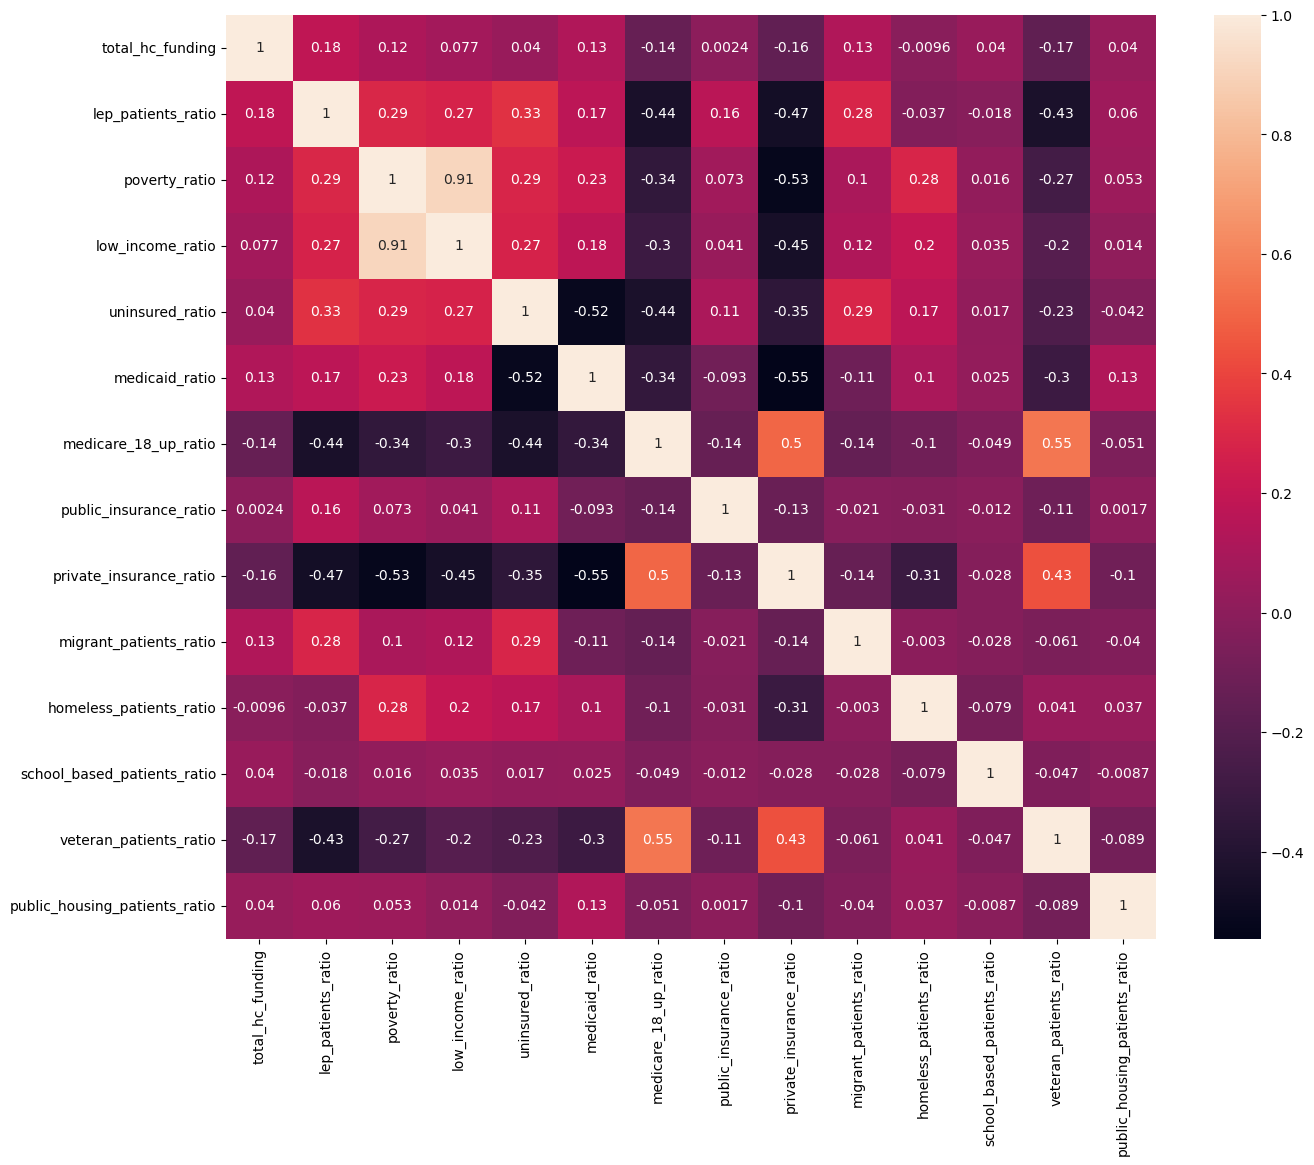

In [48]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True)

There is some negative correlation between private health insurance and health center funding, as well as Medicare insurance and health center funding, these were not very strong correlations, -0.16 and -0.14 respectively.

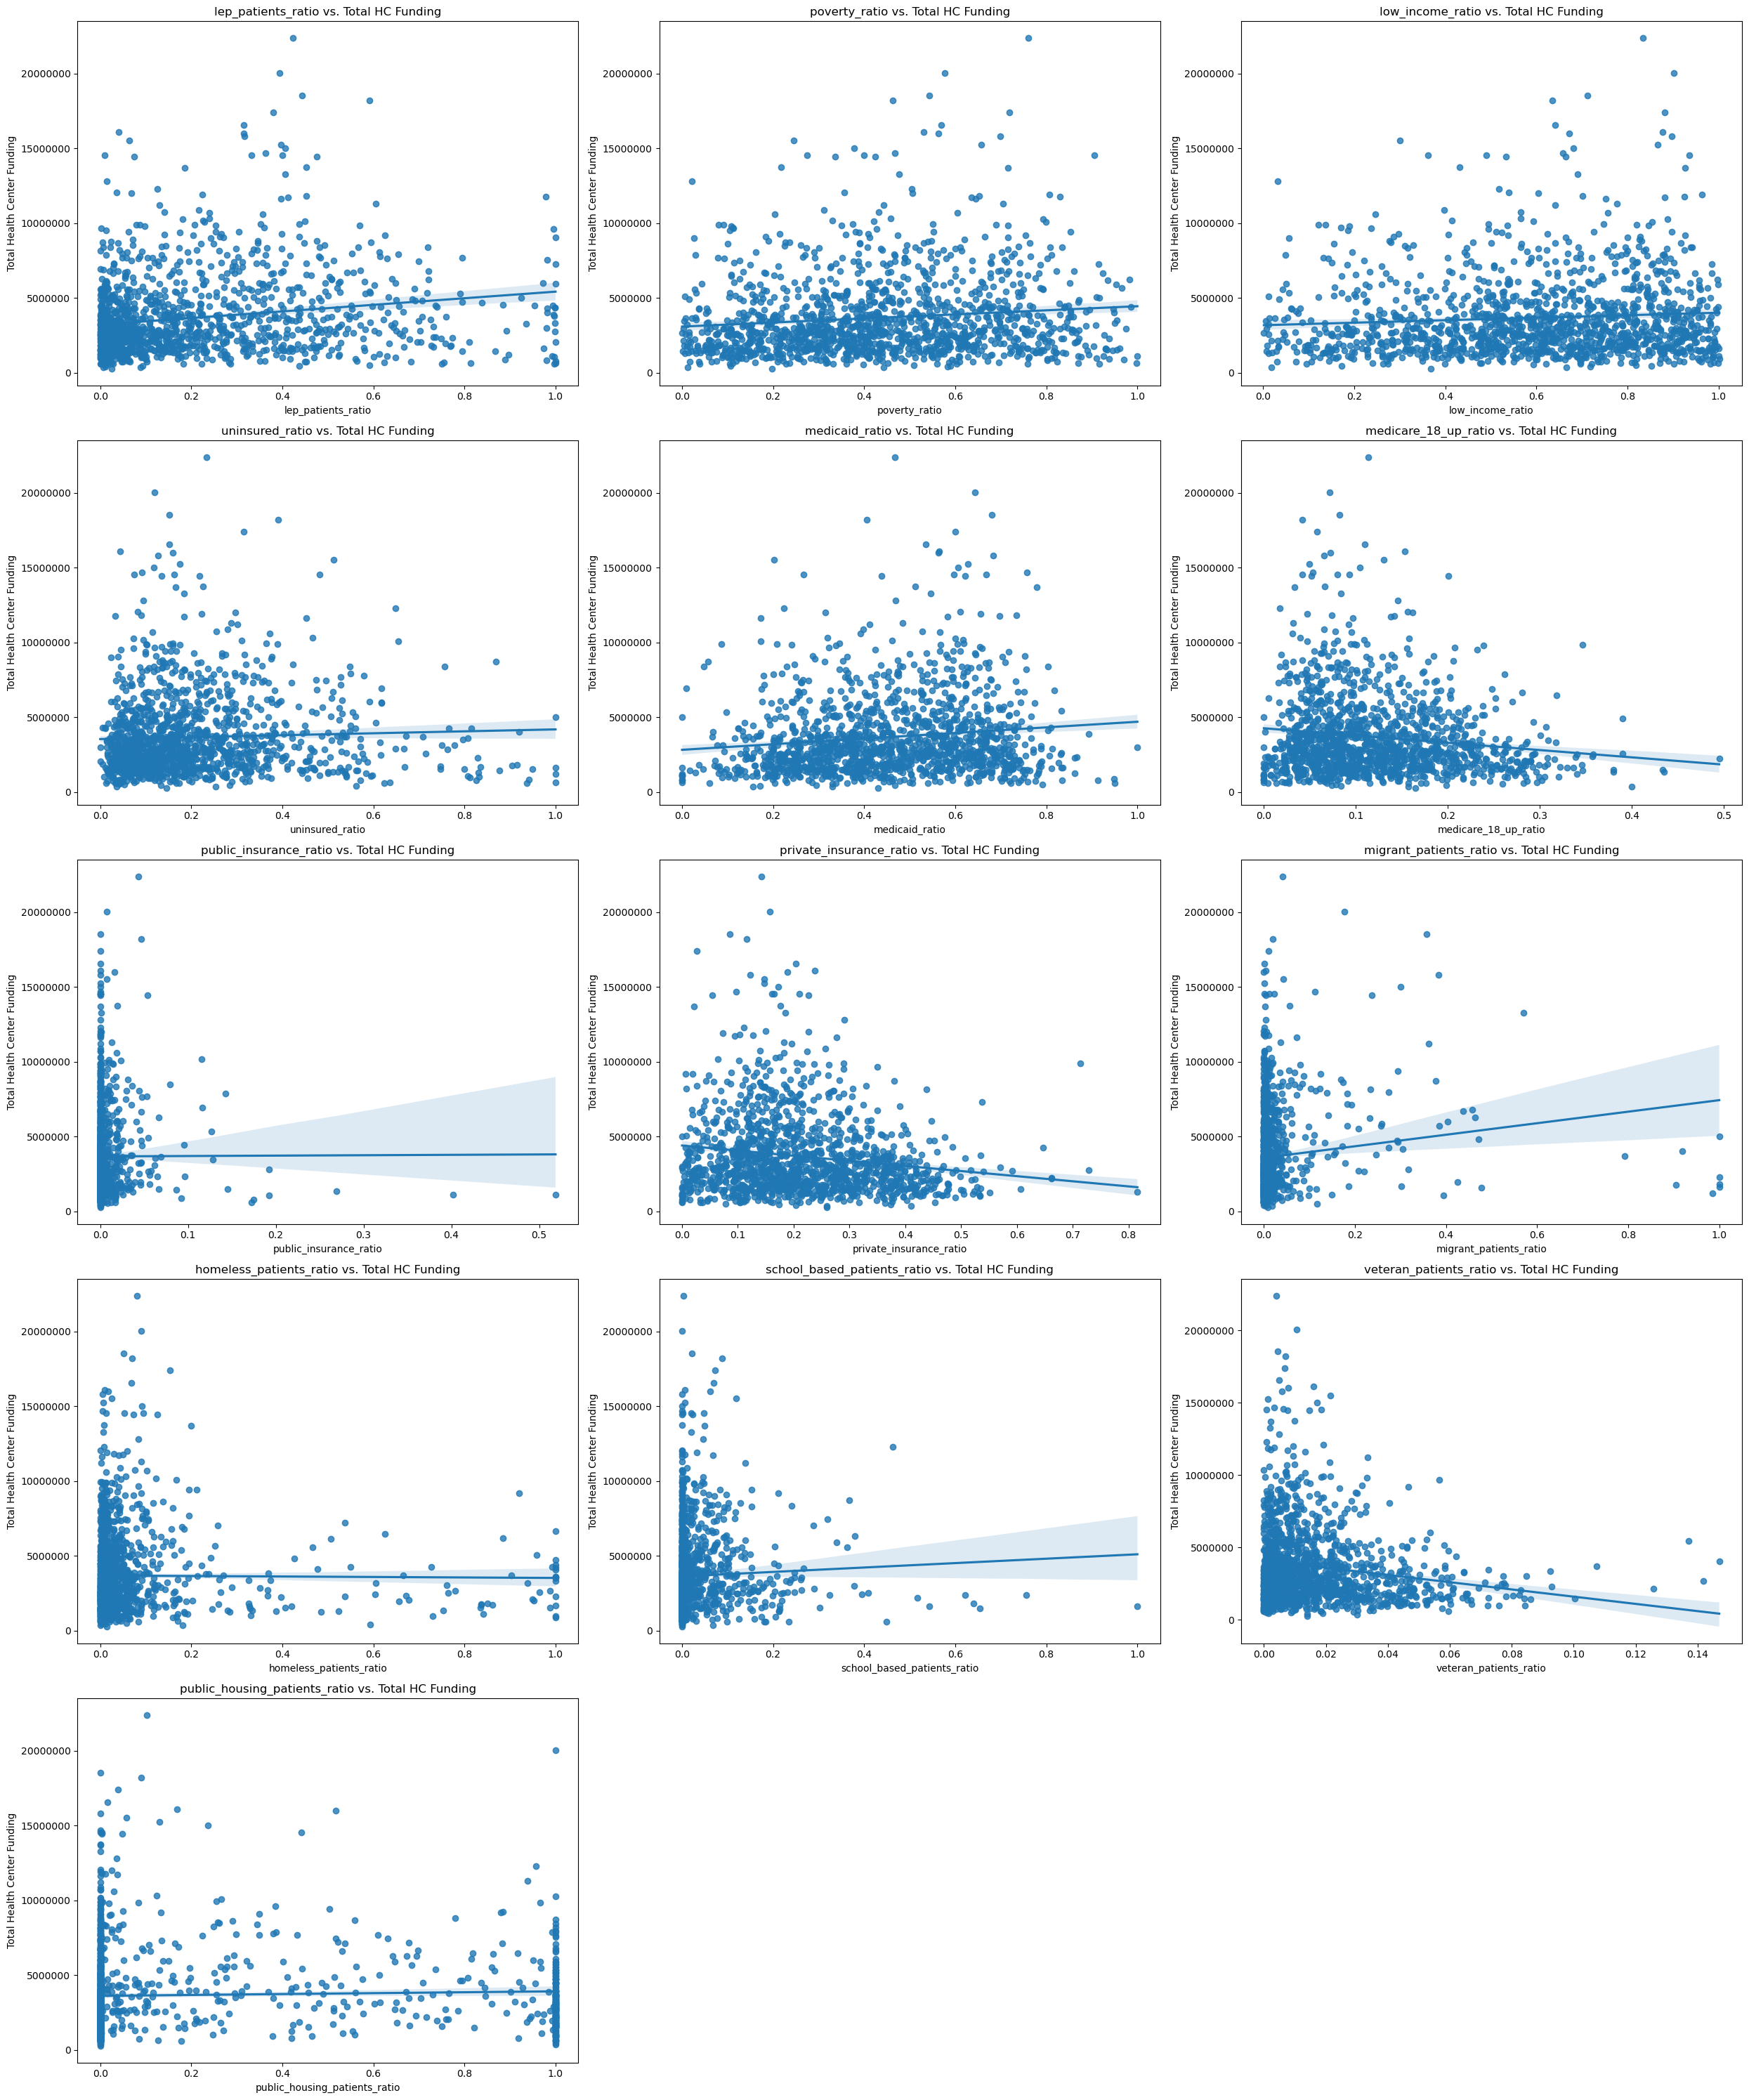

In [49]:
# create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 30))
axes = axes.flatten()

# Loop over the variables and create a scatter plot for each
for i, var in enumerate(sdoh_props):
    sns.regplot(ax=axes[i], data=health_centers, x=var, y='total_hc_funding')
    axes[i].set_title(f'{var} vs. Total HC Funding')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Total Health Center Funding')
    axes[i].ticklabel_format(style='plain', axis='both')  # Turn off scientific notation
    
for ax in axes[len(sdoh_props):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

We see some very minor correlations between patients' social determinants of health proportions and total health center funding. I am surprised to see that there is virtually no correlation between proportion of uninsured patients and total funding received. 

## Summary of Analysis on Diversity and SDOH

What I found most interesting is that the volume of patients belonging to racial and ethnic mintorities, as well as the volume of patients with one or more social determinant of health appears to be more important for health center funding funding than the ratio of total patients served in each of these categories. I was under the assumption that the proportions would be more of a factor if health centers serve patients who are not considered high need. We will see if some of thes features have mroe importance than other later on during modeling. 

## Health Center Operations

In [50]:
# subset operations data and total funding and patients

ops = health_centers[['total_hc_funding', 'total_patients', 'total_costs_medical', 'total_costs_dental', 'total_costs_mh',
       'total_costs_enabling', 'total_costs_quality', 'total_cost_care',
       'medical_clinic_visits', 'medical_virtual_visits', 'medical_patients',
       'dental_clinic_visits', 'dental_virtual_visits', 'dental_patients',
       'mh_clinic_visits', 'mh_virtual_visits', 'mh_patients',
       'enabling_clinic_visits', 'enabling_virtual_visits',
       'enabling_patients', 'total_clinic_visits', 'total_virtual_visits',
       'ZipCode_Count', 'SiteCity_Count', 'SiteState_Count',
       'Admin_Service_Delivery_Sites_Count', 'Service_Delivery_Sites_Count',
       'TotalWeeklyHoursOfOperation']]

In [51]:
missing = ops.isna().sum().reset_index()
missing.rename(columns={0:'count_missing'}, inplace=True)
missing['perc_missing'] = ((missing['count_missing'] / len(ops)) * 100).round(2)
missing

index  count_missing  perc_missing
0                     total_hc_funding              0          0.00
1                       total_patients              0          0.00
2                  total_costs_medical            629         45.91
3                   total_costs_dental            629         45.91
4                       total_costs_mh            629         45.91
5                 total_costs_enabling            629         45.91
6                  total_costs_quality            629         45.91
7                      total_cost_care            629         45.91
8                medical_clinic_visits            579         42.26
9               medical_virtual_visits            579         42.26
10                    medical_patients            579         42.26
11                dental_clinic_visits            579         42.26
12               dental_virtual_visits            579         42.26
13                     dental_patients            579         42.26
14                    mh_clinic_visits            579         42.26
15                   mh_virtual_visits            579         42.26
16                         mh_patients            579         42.26
17              enabling_clinic_visits            579         42.26
18             enabling_virtual_visits            579         42.26
19                   enabling_patients            579         42.26
20                 total_clinic_visits            579         42.26
21                total_virtual_visits            579         42.26
22                       ZipCode_Count              0          0.00
23                      SiteCity_Count              2          0.15
24                     SiteState_Count              2          0.15
25  Admin_Service_Delivery_Sites_Count              2          0.15
26        Service_Delivery_Sites_Count              2          0.15
27         TotalWeeklyHoursOfOperation              2          0.15

The operations dataframe is missing a lot of data and it is missing not at random. During pre-processing, I want to try imputing values using MICE impuation. HOwever, I first want to look at these variables for which I do have data to see if I will keep them all or make any changes. 

<Axes: >

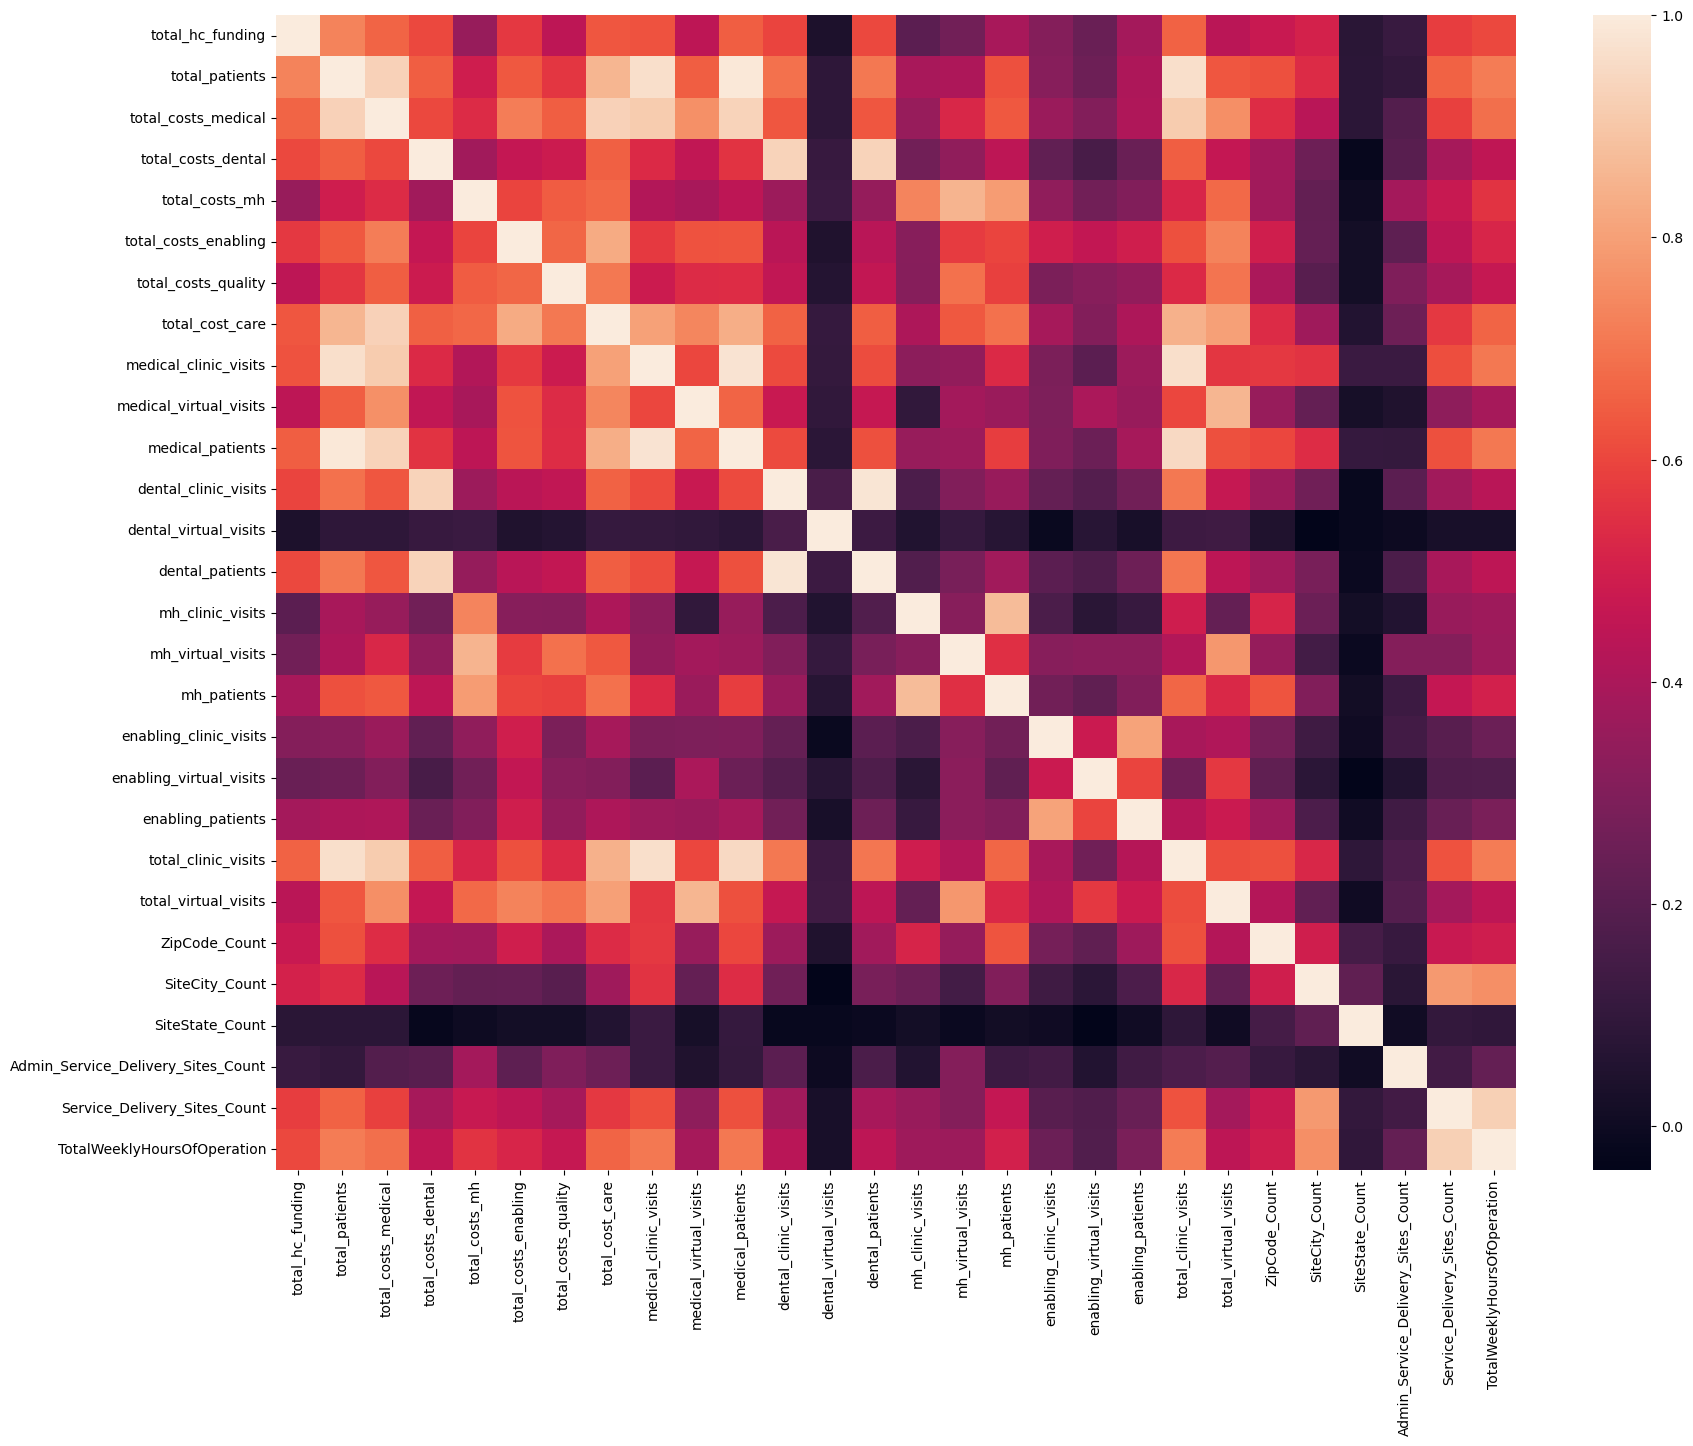

In [52]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(ops.corr())

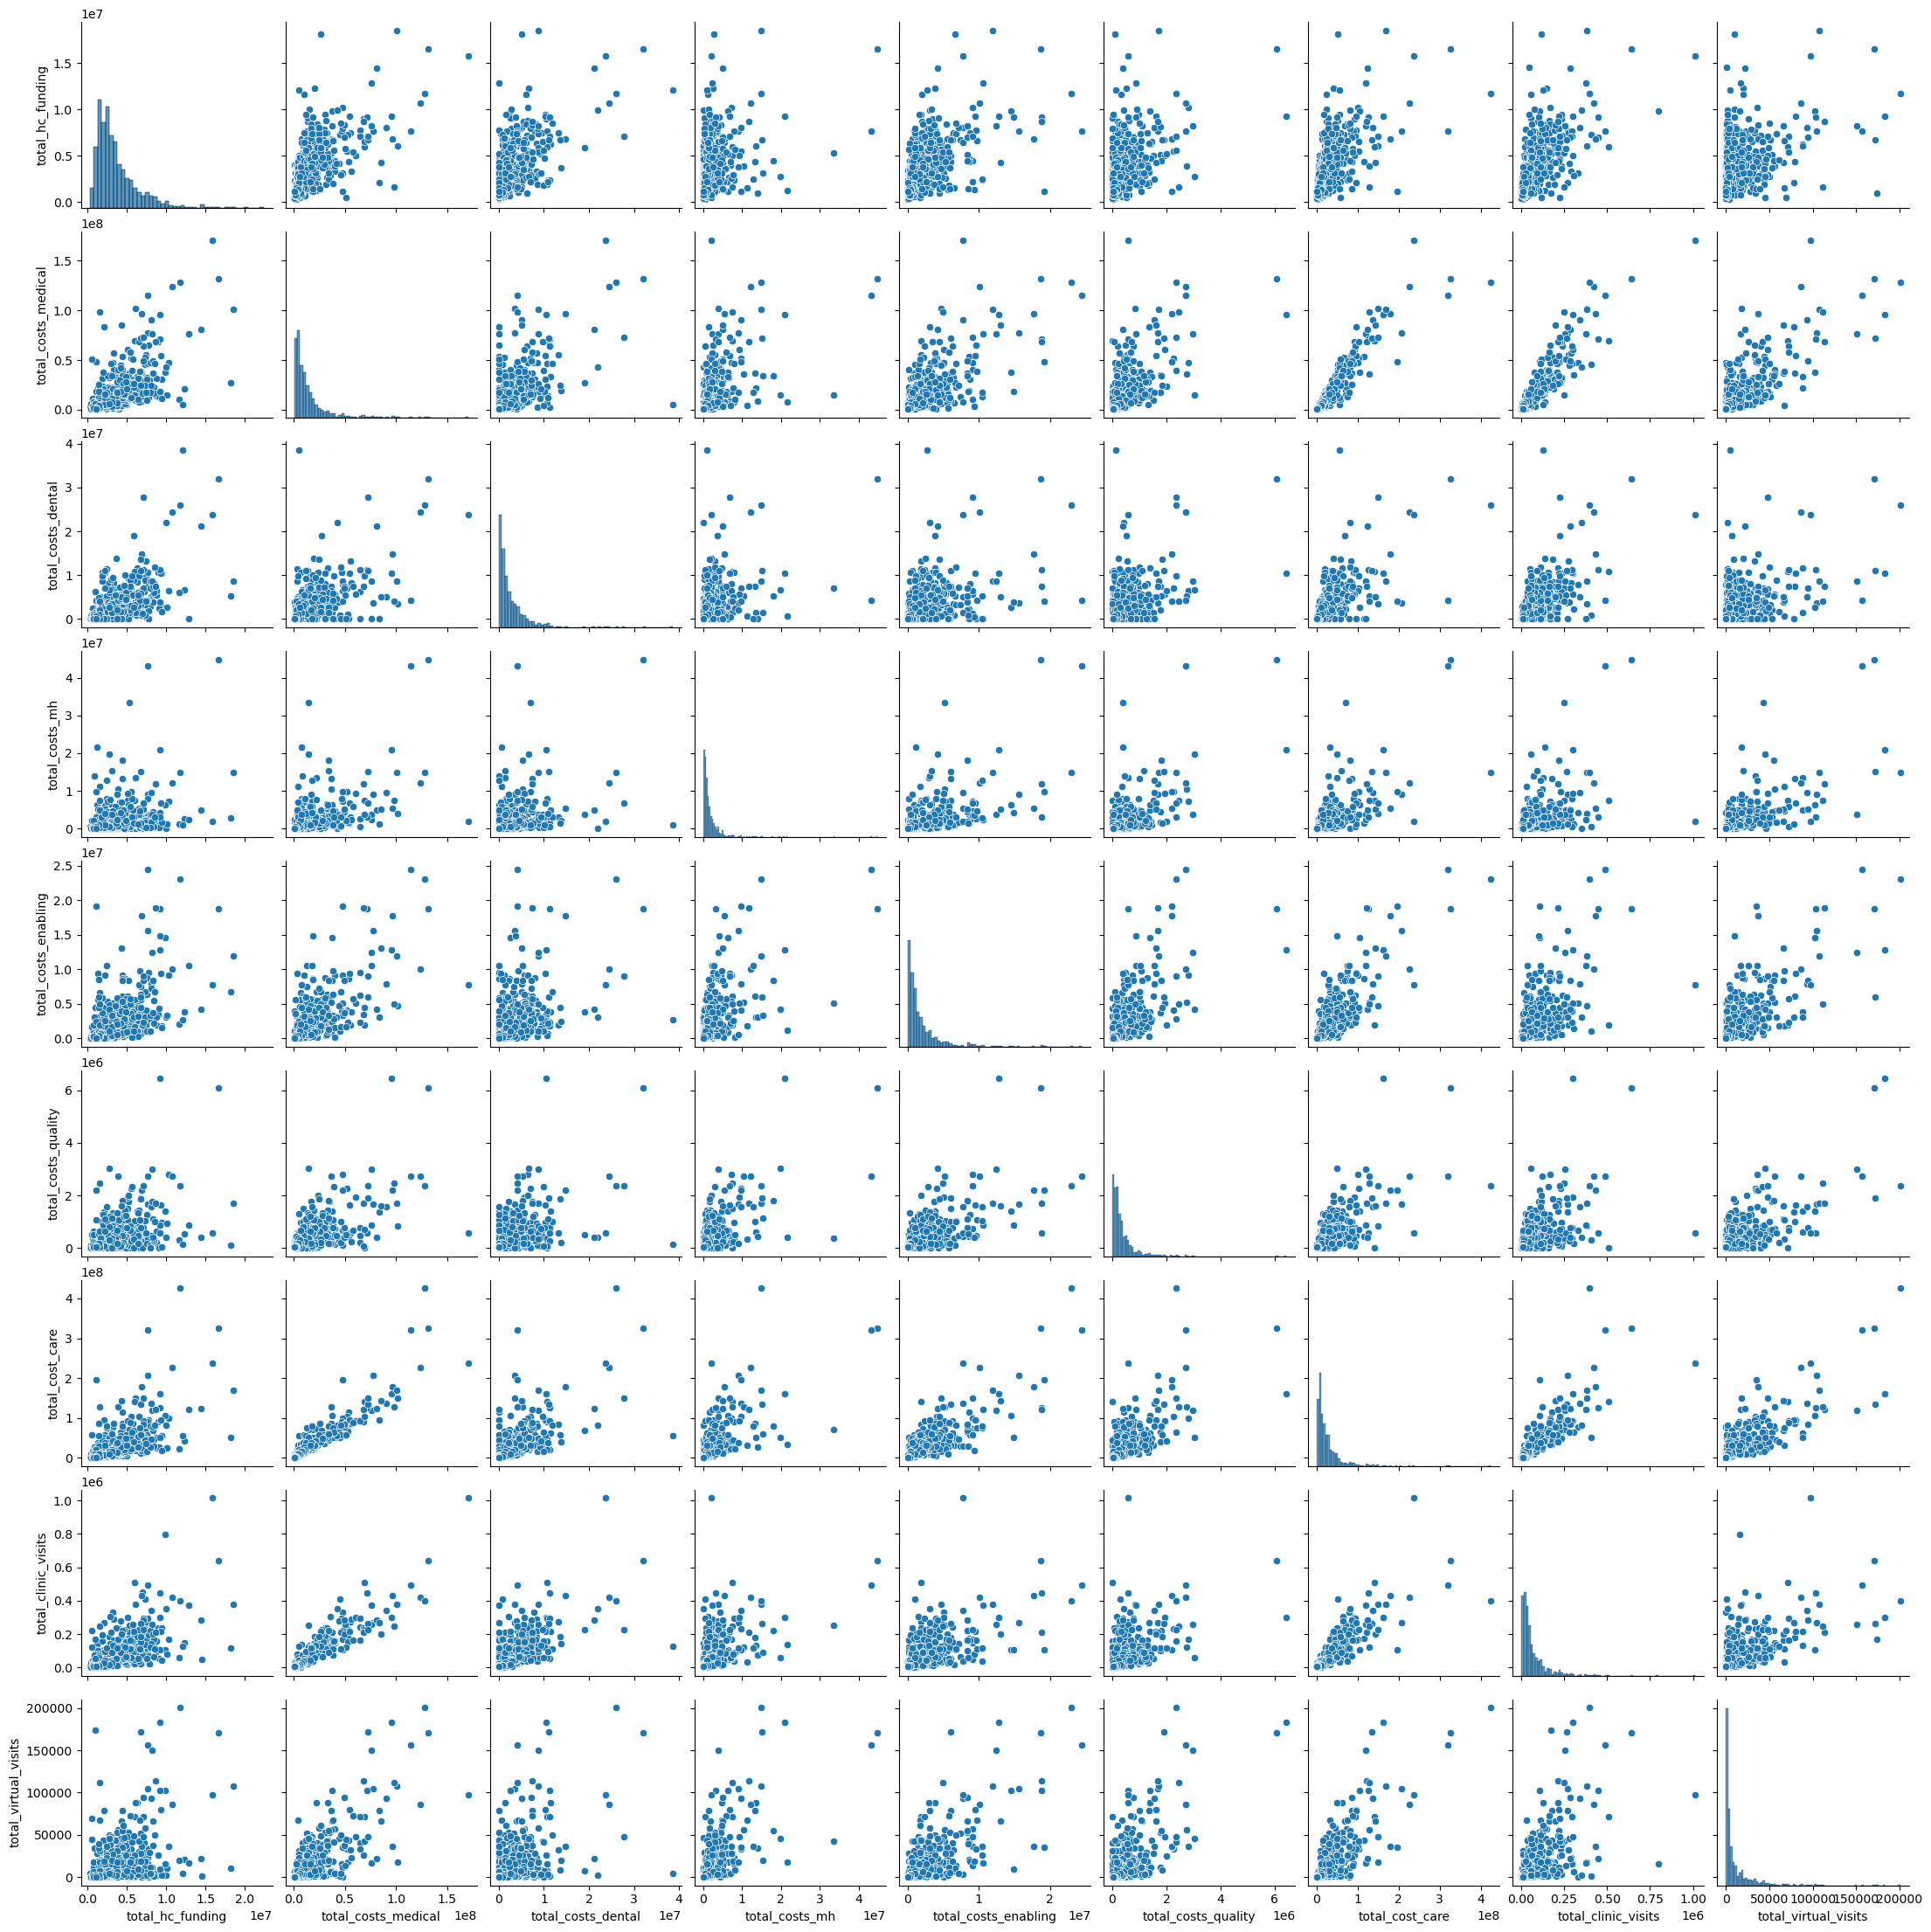

In [53]:
sns.pairplot(ops[['total_hc_funding', 'total_costs_medical', 'total_costs_dental', 'total_costs_mh',
       'total_costs_enabling', 'total_costs_quality', 'total_cost_care', 'total_clinic_visits', 'total_virtual_visits']])

## Health Center Operations Analysis
In general, we can see that total funding increases across the board with increased medical, dental, mental health, quality, and enabling service costs as well as the various types of clinical visits. Instead of keeping all of these columns, I am going to keep just the total columns for costs of care, visits, and virtual visits as they demonstrate similar trends to the more detailed columns when plotted agains total_hc_funding. These columns are also most strongly correlated with total health center funding. Additionally, there is likely some colinearity in these data because as there are increased visits, there are increased costs of care and vice versa. 

The count of administrative sites does not seem to be particularly meaningful for any relationships with overall operations. I am going to add this count to the service delivery sites column to provide a new value. I am not simply removing this column because some smaller operations may have their administrative site in the same place as their clinical services site, and it may be their only operation service site. 

The count of states entities are operating in also does not seem to provide much in terms of relationship with funding or other columns. I will remove this for modeling. 

In [54]:
# combine admin site count and service delivery site count
health_centers['total_sites'] = health_centers['Service_Delivery_Sites_Count'] + health_centers['Admin_Service_Delivery_Sites_Count']

In [55]:
health_centers.columns.to_list()

['BHCMISID',
 'GrantNumber',
 'HealthCenterName',
 'HealthCenterCity',
 'HealthCenterState',
 'FundingCHC',
 'FundingMHC',
 'FundingHO',
 'FundingPH',
 'UrbanRuralFlag',
 'mhc_amount',
 'chc_amount',
 'ho_amount',
 'ph_amount',
 'total_hc_funding',
 'total_other_revenue',
 'total_revenue',
 'total_male',
 'total_female',
 'hispanic_any_race',
 'total_patients',
 'lep_patients',
 'fpl_100_below',
 'fpl_101_to_150',
 'fpl_151_to_200',
 'fpl_over_200',
 'fpl_unknown',
 'uninsured_0_17',
 'uninsured_18_up',
 'medicaid_0_17',
 'medicaid_18_up',
 'medicare_18_up',
 'public_insurance_0_17',
 'public_insurance_18_up',
 'private_insurance_0_17',
 'private_insurance_18_up',
 'total_0_17',
 'total_18_up',
 'migrant_patients',
 'homeless_patients',
 'school_based_patients',
 'veteran_patients',
 'public_housing_patients',
 'total_costs_medical',
 'total_costs_dental',
 'total_costs_mh',
 'total_costs_enabling',
 'total_costs_quality',
 'total_cost_care',
 'total_charges',
 'total_collected',
 'tot

In [56]:
# define columns to drop before
cols_to_drop = ['mhc_amount', 'chc_amount', 'ho_amount', 'ph_amount', 
                'total_costs_medical', 'total_costs_dental', 'total_costs_mh','total_costs_enabling', 
                'total_costs_quality', 'medical_clinic_visits', 'medical_virtual_visits', 
                'medical_patients','dental_clinic_visits', 'dental_virtual_visits', 'dental_patients',
                'mh_clinic_visits', 'mh_virtual_visits', 'mh_patients', 'enabling_clinic_visits', 
                'enabling_virtual_visits', 'enabling_patients', 'SiteState_Count',
                'Admin_Service_Delivery_Sites_Count', 'Service_Delivery_Sites_Count', 
                'collections_charges_ratio', 'total_male', 'total_female', 
                'fpl_over_200', 'fpl_unknown', 'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17', 
                'medicare_18_up', 'public_insurance_0_17', 'public_insurance_18_up',
                'private_insurance_0_17', 'private_insurance_18_up', 'GrantNumber', 'HealthCenterCity']

In [57]:
# create new dataframe
df = health_centers.drop(columns=cols_to_drop)

Text(0.5, 0, 'Funding per patient ($)')

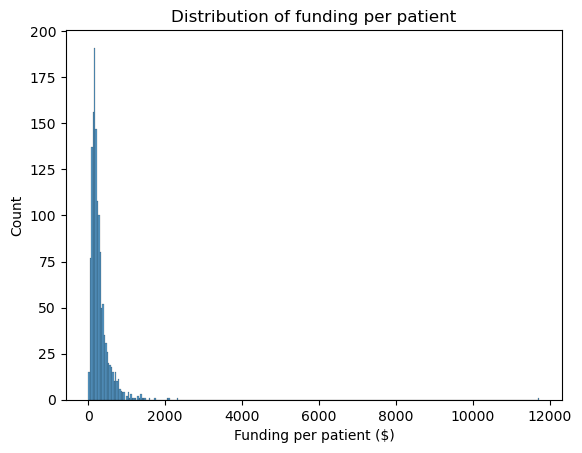

In [58]:
df['funding_per_patient'] = df['total_hc_funding'] / df['total_patients']

fig, ax = plt.subplots()
sns.histplot(df['funding_per_patient'], ax=ax)
plt.title('Distribution of funding per patient')
plt.xlabel('Funding per patient ($)')

In [59]:
df['funding_per_patient'].describe()

count     1370.000000
mean       292.260097
std        389.504720
min          5.547653
25%        141.238903
50%        214.242723
75%        343.581235
max      11727.675325
Name: funding_per_patient, dtype: float64

Interestingly there are huge outliers in this graph, with some entities receiving significantly more funding per patient than most others. There are also others that have extremely low funding per patient values.  Let's take a closer look at the data. 

This is intersting because earlier the charts demonstrate how the volume of patients served is strongly correlated with total funding. This suggests that some smaller entities receive more funding proportionally despite not serving as many patients as large entities. I am going to investigate some of the difference between these entities by grouping them and seeing if they differ in any of the newly calculated columns.

In [60]:
# define bin edges
edges = df['funding_per_patient'].quantile([0, 0.25, 0.50, 0.75, 0.90, 1]).values

# define labels for the bins
labels = ['0-25%', '25-50%', '50-75%', '75-90%', '90-100%']

# create the categorical groups
df['funding_per_patient_group'] = pd.cut(df['funding_per_patient'], bins=edges, labels=labels, include_lowest=True)

# verify the distribution among the categories
print(df['funding_per_patient_group'].value_counts())

funding_per_patient_group
0-25%      343
25-50%     342
50-75%     342
75-90%     206
90-100%    137
Name: count, dtype: int64


In [61]:
df.pivot_table(values=['uninsured_ratio', 'poverty_ratio', 'low_income_ratio', 'other_to_rev_ratio', 'diverse_race_proportion', 
                       'hispanic_proportion'], 
               index='funding_per_patient_group', aggfunc='mean')

diverse_race_proportion  hispanic_proportion  \
funding_per_patient_group                                                 
0-25%                                     0.211766             0.318719   
25-50%                                    0.208899             0.310402   
50-75%                                    0.250034             0.267218   
75-90%                                    0.282042             0.258969   
90-100%                                   0.339289             0.217369   

                           low_income_ratio  other_to_rev_ratio  \
funding_per_patient_group                                         
0-25%                              0.580794            0.074419   
25-50%                             0.599870            0.049907   
50-75%                             0.607335            0.050725   
75-90%                             0.590841            0.039444   
90-100%                            0.577240            0.041840   

                           poverty_ratio  uninsured_ratio  
funding_per_patient_group                                  
0-25%                           0.421747         0.158829  
25-50%                          0.425868         0.184428  
50-75%                          0.443209         0.214752  
75-90%                          0.437996         0.254526  
90-100%                         0.443260         0.277997

It appears that the entities with more funding per patient have more diverse patient populations and higher uninsured rates among their patients. 

In [62]:
df.pivot_table(values=['migrant_patients_ratio', 'homeless_patients_ratio', 'school_based_patients_ratio', 'veteran_patients_ratio', 
                       'public_housing_patients_ratio'], 
               index='funding_per_patient_group', aggfunc='mean')

homeless_patients_ratio  migrant_patients_ratio  \
funding_per_patient_group                                                    
0-25%                                     0.031901                0.017243   
25-50%                                    0.041345                0.023710   
50-75%                                    0.041120                0.019635   
75-90%                                    0.096282                0.022606   
90-100%                                   0.210228                0.057839   

                           public_housing_patients_ratio  \
funding_per_patient_group                                  
0-25%                                           0.202507   
25-50%                                          0.181472   
50-75%                                          0.209753   
75-90%                                          0.214181   
90-100%                                         0.162881   

                           school_based_patients_ratio  veteran_patients_ratio  
funding_per_patient_group                                                       
0-25%                                         0.026712                0.012809  
25-50%                                        0.041113                0.015616  
50-75%                                        0.030352                0.017505  
75-90%                                        0.022146                0.019846  
90-100%                                       0.015106                0.023328

Additionally, it appears the entities with more funding per patient serve higher proportions of their patients who are homeless or migrants cmopared to other health centers. Of these, homelessness seems to be a larger factor. 

In [63]:
df.pivot_table(values=['total_sfs', 'total_clinic_visits', 'total_virtual_visits', 
                       'ZipCode_Count', 'SiteCity_Count', 'total_sites', 'TotalWeeklyHoursOfOperation', 
                       'total_grant_funding', 'total_patients'], 
               index='funding_per_patient_group', aggfunc='mean').apply(lambda x: x.apply('{0:.2f}'.format))

SiteCity_Count TotalWeeklyHoursOfOperation  \
funding_per_patient_group                                              
0-25%                               6.63                      727.39   
25-50%                              4.91                      436.30   
50-75%                              3.83                      297.51   
75-90%                              2.99                      261.48   
90-100%                             3.16                      251.43   

                          ZipCode_Count total_clinic_visits  \
funding_per_patient_group                                     
0-25%                            114.04           149487.87   
25-50%                            72.16            72944.27   
50-75%                            56.30            39983.84   
75-90%                            40.33            25532.46   
90-100%                           35.55            14147.44   

                          total_grant_funding total_patients   total_sfs  \
funding_per_patient_group                                                  
0-25%                             13245420.58       47346.07  4613968.35   
25-50%                             9403544.46       22317.64  2569299.66   
50-75%                             6789338.28       13191.15  1594730.57   
75-90%                             5855718.68        7719.43  1275656.82   
90-100%                            4968709.02        3966.17   690165.69   

                          total_sites total_virtual_visits  
funding_per_patient_group                                   
0-25%                           17.62             26634.84  
25-50%                          11.76             12938.71  
50-75%                           7.82              7931.78  
75-90%                           7.02              3879.99  
90-100%                          5.90              2062.01

These entities seem to also be smaller operations on average, as is show by the table above. 

## Concluding Thoughts

Overall the size of an entity's operation, measured by the number of service provided, number of patients, hours of operations, number of sites, number of zipcodes, number of cities, and total revenue streams (including patient and non-patient revenue), are positively correlated with their total health center grant funding. However, we saw earlier that there are outliers where there are a number organizations that serve smaller patient populations but receive large grants. These entities receive much more funding per patient than several of the largest operations, and some of the main features associated with these difference include higher uninsured patient ratios, diverse patient ratios, homeless patient ratios, and smaller operational capacities. 

New entities may want to prioritize funding per patient versus total overall health center grant funding. 

Although I didn't observe very strong correlations between the ratio of patients in certain demographic groups and total health center funding, I want to conduct some statistical tests to determine if various demographic factors or demographic factors combined contribute to funding levels, as I observed after splitting up entities based on their funding per patient. Similarly, I want to see if there is a statistically significant difference in entities based on special populations funding, being an urban vs rural provider, and amount of other non-patient revenue. 

In [64]:
df.to_csv(DATA_PATH +'data_new_features.csv', index=False)